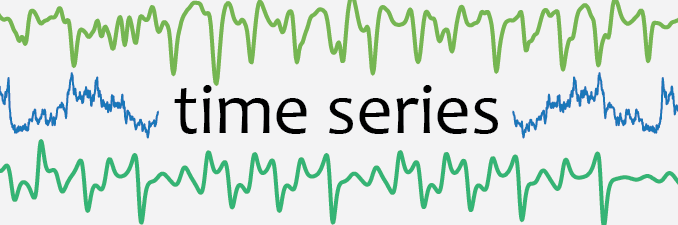

# Time Series Analysis
---

In this lecture we'll analyze the most basic concepts of time series analysis and forecasting till the most advanced and state-of-the-art techniques using LSTM.

This notebook is presented as handy and practical as possible in order to visualize what discussed in the previous theoretical part

# Table of Contents

####I°Part
- Introduction
- Time series in Python
#### II° Part
- Working with Time Series:
- Classical time series models
- Forecasting
### III° Part
- From Statistical learning to Deep Learning strategies
- Project


# Introduction

**Why python for Time series Analysis**

- High level language (easy syntax)
- General purpose
- Open source

*Setting the environment*


In [ ]:

#@title Load data from dropbox to your environment{ run: "auto", display-mode: "form" }
!wget -O Index2018.csv https://www.dropbox.com/scl/fi/p4rt2zefbtvsbtu2v7pgz/Index2018.csv?rlkey=kk6udn33gppo3vx2zc21uq58q&dl=0

!wget -O RandWalk.csv https://www.dropbox.com/scl/fi/hgu9rzv3916nbv1oxs7ij/RandWalk.csv?rlkey=0dhm79zcad6hp3oqlz1ybl0q7&dl=0





--2023-12-10 18:15:25--  https://www.dropbox.com/scl/fi/p4rt2zefbtvsbtu2v7pgz/Index2018.csv?rlkey=kk6udn33gppo3vx2zc21uq58q
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc74ffd6da7785fdde1085ed5e6e.dl.dropboxusercontent.com/cd/0/inline/CJKdZ8sToGevnmeX9ulfeMDJsvSexF81nJw1TYHVfIlUvvnHVvCCGtrUTm6YNZkXFJqLDq3owY5xMBhmwjnLW4Mb7BPryS4ySYQLzIXdk5EHpeBcY8GeULF8lmnyplSIdchJTa8WyGp__5k_buuCRUXT/file# [following]
--2023-12-10 18:15:26--  https://uc74ffd6da7785fdde1085ed5e6e.dl.dropboxusercontent.com/cd/0/inline/CJKdZ8sToGevnmeX9ulfeMDJsvSexF81nJw1TYHVfIlUvvnHVvCCGtrUTm6YNZkXFJqLDq3owY5xMBhmwjnLW4Mb7BPryS4ySYQLzIXdk5EHpeBcY8GeULF8lmnyplSIdchJTa8WyGp__5k_buuCRUXT/file
Resolving uc74ffd6da7785fdde1085ed5e6e.dl.dropboxusercontent.com (uc74ffd6da7785fdde1085ed5e6e.dl.dropboxusercontent.com)... 162.125.85.15, 2

### Time Series Data Introduction:



**Definition of time series:**

`A time series is a set of observations xt, each one being recorded at a specific time t. Mathematically, it can be represented as a sequence of values {x1,x2,…,xT} where T is the length of the series`



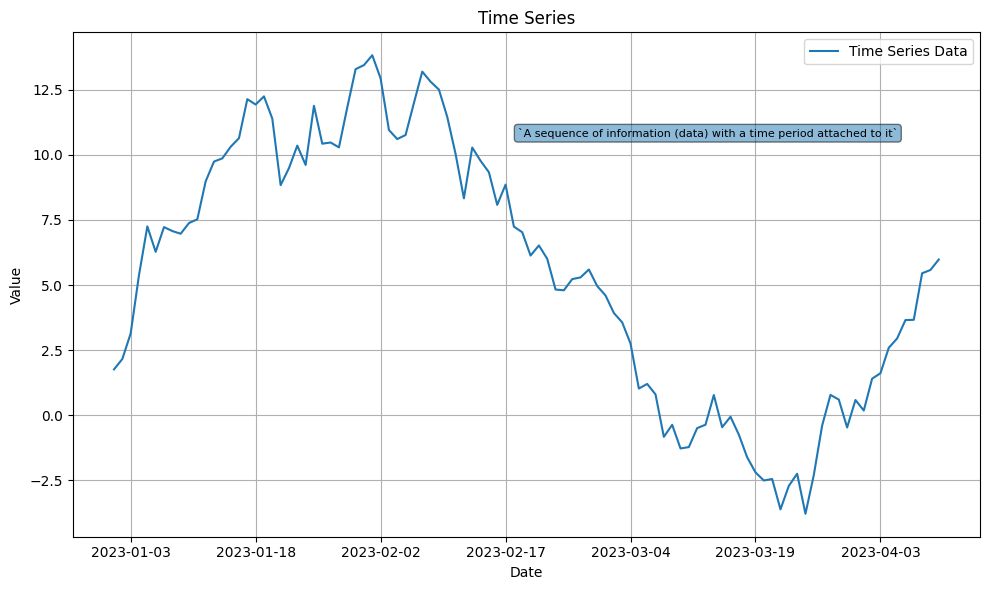


**Properties:**

1. It has a starting point and an end (singleton time series are called timestamps)

2. It requires multiple recording in between those are calles "Time Period" `TP`

3. It's ordered respect to the time


4. How often the data are recorded it's called frequency `F` ----> and `F` = CONSTANT (k)

*general time periods : year , month , week , day.*



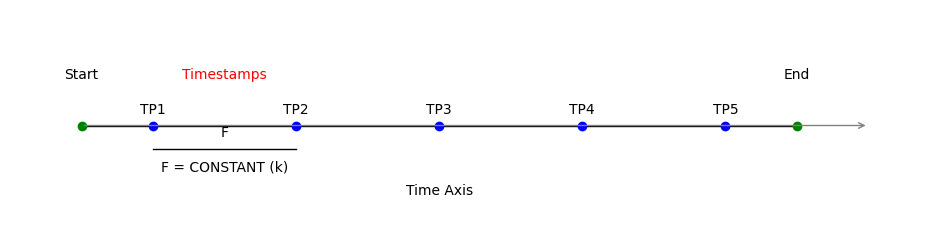

In [ ]:
# Very small example using dataframes index:

import pandas as pd
#1. Create a pandas Dataframe

dataframe = pd.DataFrame({"sales": [2,3,4,5,4,3,2] , "price": [5,4,3,2,3,4,5] , "visitors" : [10,10,10,8,8,9,9]})

dataframe.index

# change the index with specific timestamps:

dataframe.index = ["30/11/2023" , "1/12/2023" , "2/12/2023", "3/11/2023" , "4/11/2023", "5/11/2023", "6/11/2023"]

dataframe

sales  price  visitors
30/11/2023      2      5        10
1/12/2023       3      4        10
2/12/2023       4      3        10
3/11/2023       5      2         8
4/11/2023       4      3         8
5/11/2023       3      4         9
6/11/2023       2      5         9

**Notation**
<br/>
<br/>


**$$X = ["sales" , "price" , "visitors"]$$**

$$t = Day$$

$$T = Week$$




 **Peculiarities of Time series Data:**

 - Dealing with missing data

 - Aggregating data or increasing the frequency of the data records could be useful to analyze different time windows

 - Time series Modelling doesn't satisfy Gauss-Markov assumption
                              
 - Patterns observed in timeseries data are expected to persist in the future.

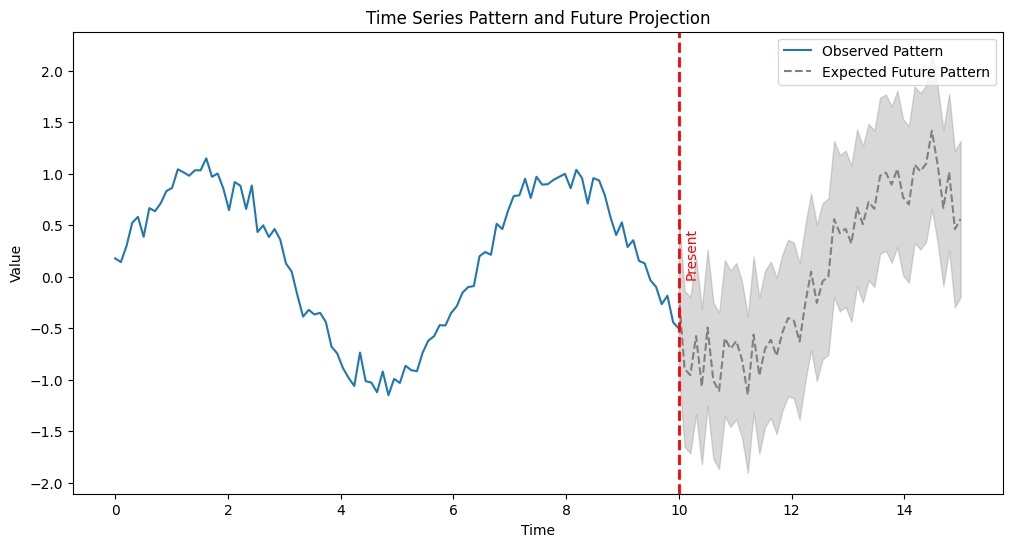

**Time series Analysis Basics**

Import libraries:

In [ ]:
import numpy as np
import pandas as pd

import data

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

# Replace with your file's path
file_path = '/content/drive/MyDrive/Index2018.csv'

# Reading the CSV file
df = pd.read_csv('Index2018.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Very simple EDA:

In [ ]:
# Display the DataFrame
df.head()

date     spx      dax     ftse    nikkei
0  07/01/1994  469.90  2224.95  3445.98  18124.01
1  10/01/1994  475.27  2225.00  3440.58  18443.44
2  11/01/1994  474.13  2228.10  3413.77  18485.25
3  12/01/1994  474.17  2182.06  3372.02  18793.88
4  13/01/1994  472.47  2142.37  3360.01  18577.26

In [ ]:
df.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [ ]:
#take data from my drive
df.describe()

spx           dax         ftse        nikkei
count  6269.000000   6269.000000  6269.000000   6269.000000
mean   1288.127542   6080.063363  5422.713545  14597.055700
std     487.586473   2754.361032  1145.572428   4043.122953
min     438.920000   1911.700000  2876.600000   7054.980000
25%     990.671905   4069.350000  4486.100000  10709.290000
50%    1233.420000   5773.340000  5662.430000  15028.170000
75%    1459.987747   7443.070000  6304.250000  17860.470000
max    2872.867839  13559.600000  7778.637689  24124.150000

In [ ]:
# Check for NaN values
print(f'The null values of the dataframes are : {df.isna().sum()}')



print("\nor in a more tedious way : \n")

#check specific column

print(f' spx null values : {df.dax.isna().sum()}')
print(f' ftse null values : {df.ftse.isna().sum()}')
print(f' spx null values : {df.spx.isna().sum()}')
print(f' spx null values : {df.nikkei.isna().sum()}')

The null values of the dataframes are : date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

or in a more tedious way : 

 spx null values : 0
 ftse null values : 0
 spx null values : 0
 spx null values : 0


**Time series singular Plotting**

##### Plotting

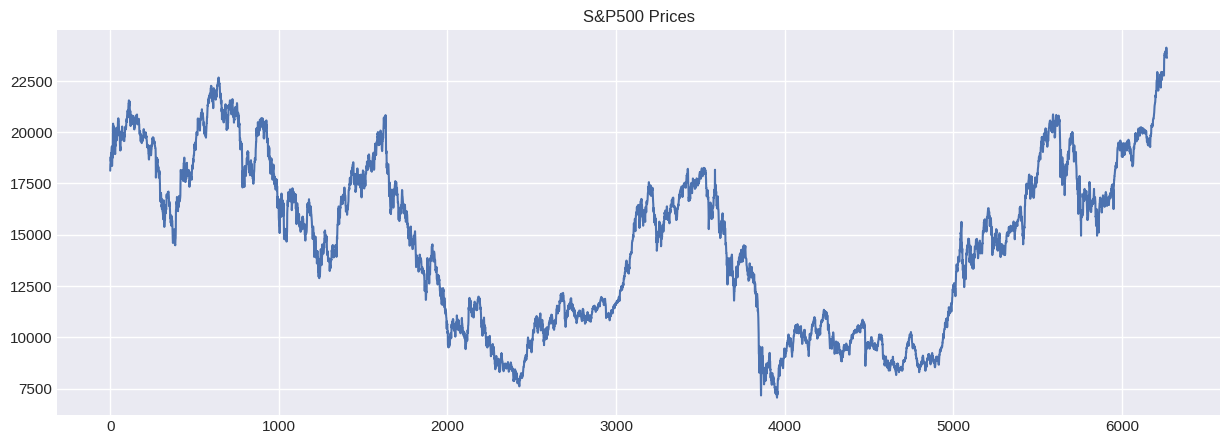

In [ ]:
import matplotlib.pyplot as plt
df.nikkei.plot(figsize = (15,5) , title = "S&P500 Prices")
plt.show() #it is used in order to show the proper object (plot) created

**Grid Plotting:**

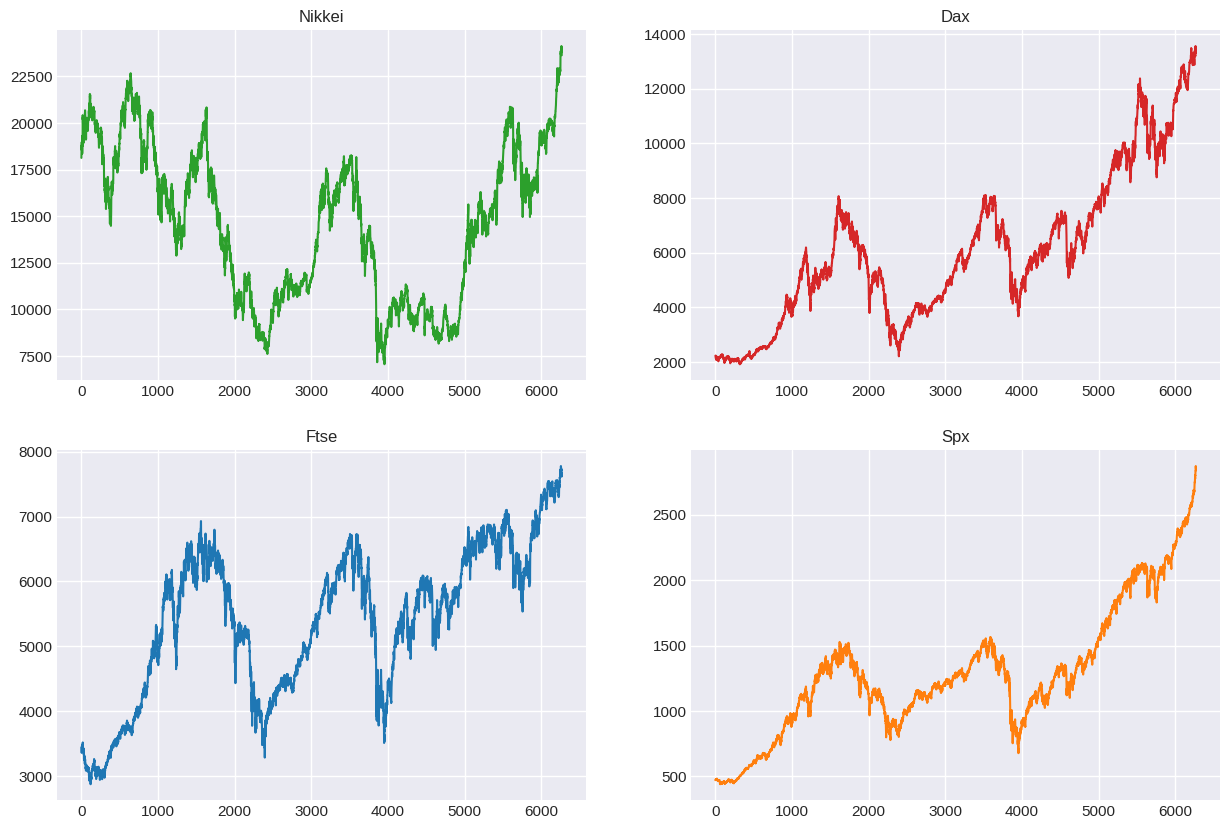

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# Plot on each subplot
axs[0, 0].plot(df.nikkei ,'tab:green')
axs[0, 0].set_title('Nikkei')

axs[0, 1].plot(df.dax, 'tab:red')
axs[0, 1].set_title('Dax')

axs[1, 0].plot(df.ftse, 'tab:blue')
axs[1, 0].set_title('Ftse')

axs[1, 1].plot(df.spx ,'tab:orange')
axs[1, 1].set_title('Spx')

plt.show()

**Comparative plotting**

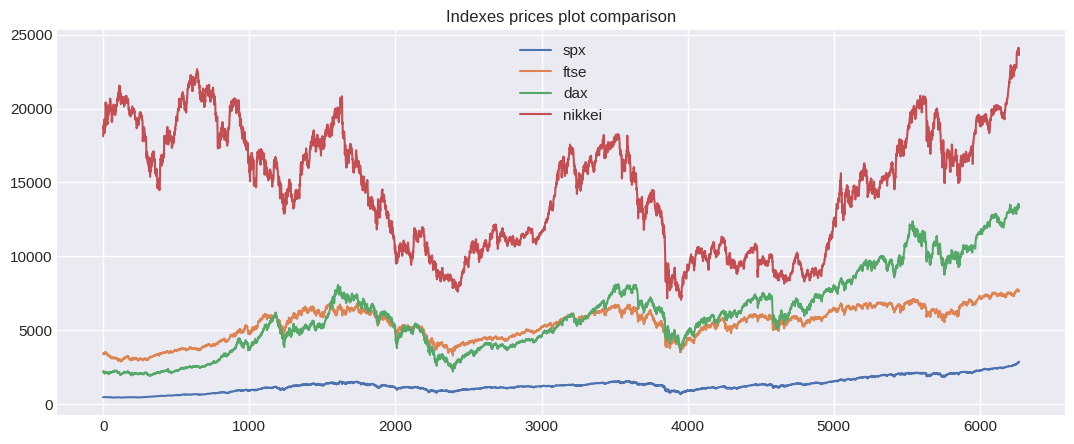

In [ ]:
df.spx.plot(figsize=(13,5), title= "Standard and Poor Prices")
df.ftse.plot(figsize = (13,5) , title = "Ftse prices")
df.dax.plot(figsize = (13,5) , title = "Dax prices")
df.nikkei.plot(figsize = (13,5) , title = "Nikkei prices")

#put title
plt.title("Indexes prices plot comparison")
plt.legend()
plt.show()

**Add the date-time in the axis**


In [ ]:
# it's important to trasform object into datetime accepted by matplotlib.pyplot

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

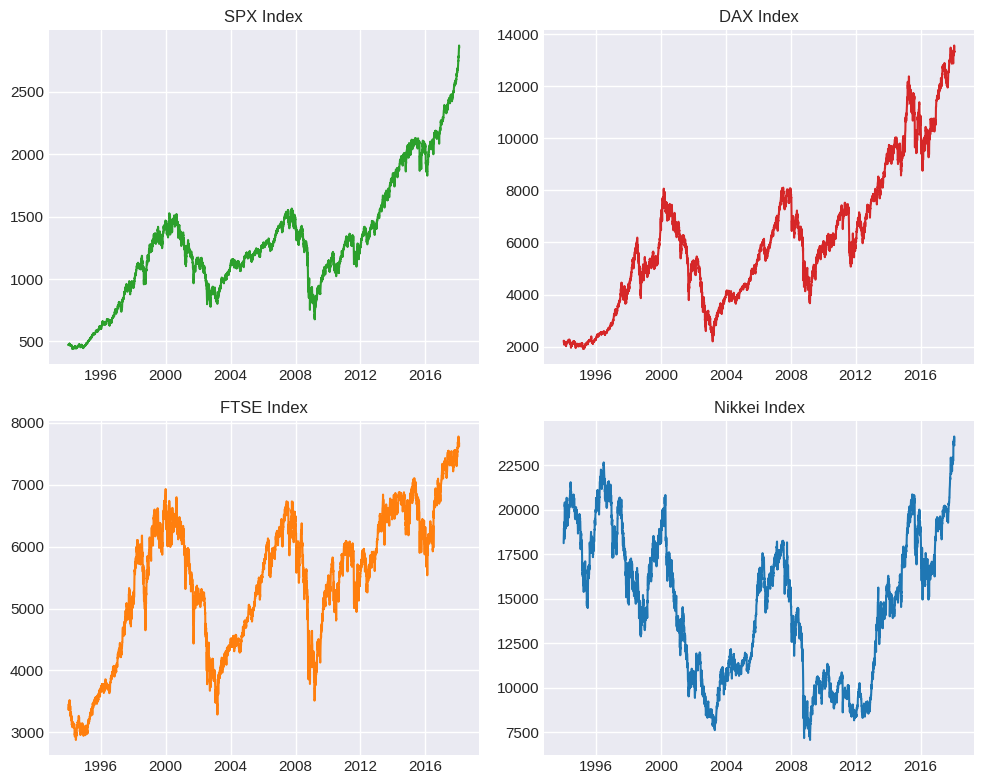

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


axs[0, 0].plot(df['date'], df['spx'], 'tab:green')
axs[0, 0].set_title('SPX Index')

axs[0, 1].plot(df['date'], df['dax'], 'tab:red')
axs[0, 1].set_title('DAX Index')

axs[1, 0].plot(df['date'], df['ftse'], 'tab:orange')
axs[1, 0].set_title('FTSE Index')

axs[1, 1].plot(df['date'], df['nikkei'], 'tab:blue')
axs[1, 1].set_title('Nikkei Index')

plt.tight_layout()
plt.show()


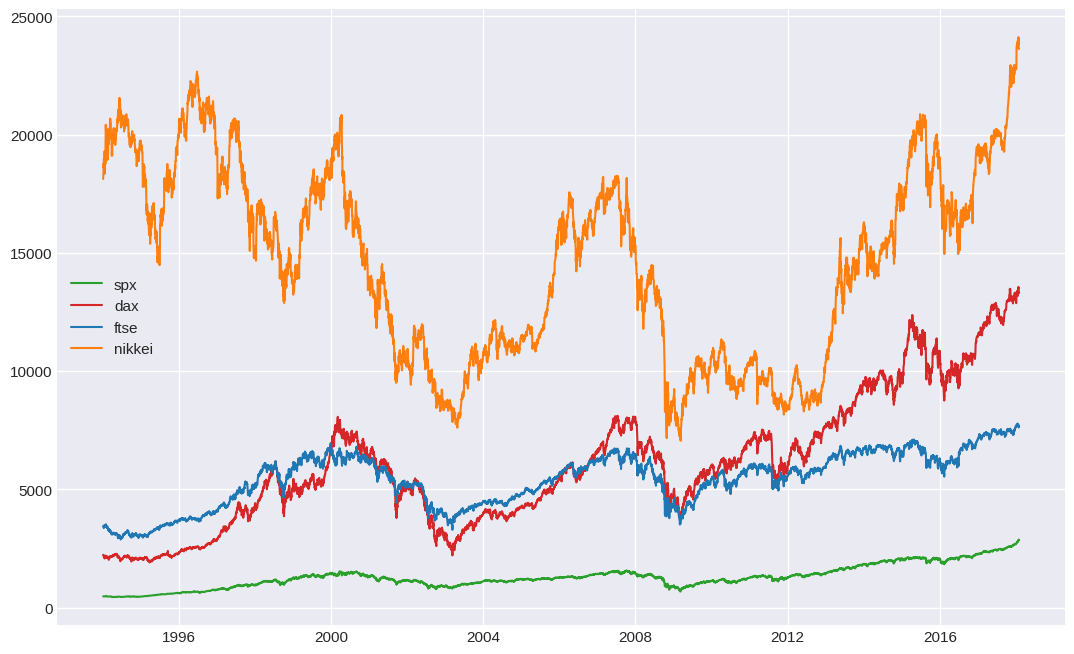

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(13, 8))
plt.plot(df['date'], df['spx'], 'tab:green')
plt.plot(df['date'], df['dax'], 'tab:red')
plt.plot(df['date'], df['ftse'], 'tab:blue')
plt.plot(df['date'], df['nikkei'], 'tab:orange')
plt.legend(["spx" , "dax" , "ftse" , "nikkei"])
plt.show()

**Other plots: **

- Quantile - Quantile Plot :

 Let's see if the data are under certain normality assumption

 import 2 libraries



1. scipy.stats  https://docs.scipy.org/doc/scipy/
2. pylab




Let's do some code:

In [ ]:
import scipy.stats
import pylab

create a random probplot

#### Normality

**Note:**

The Q-Q plot takes all the values and arrange it in order on the y axis

`y- axis` : Ordered values of reference

`X- axis` : Theoretical quantile of the probability distribution

or

How many standard deviation (std) away from the mean these values are


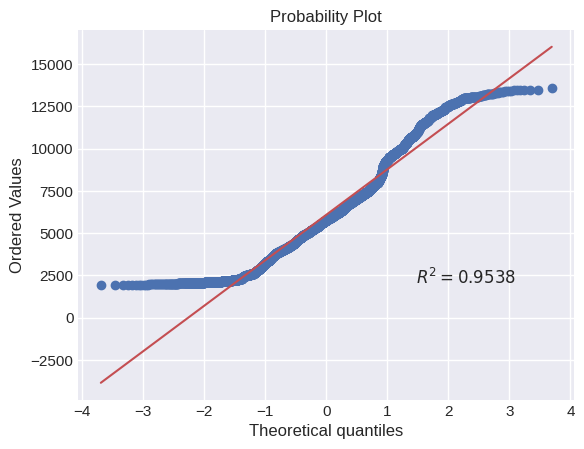

In [ ]:
scipy.stats.probplot(df.dax , plot= plt , fit = True, rvalue = True )

plt.show()

*The red line represent the trend of the data if they are normally distributed*

#Time series in Python


Usually when we receive data with datetime that column is an object (string)





In [ ]:
df.date.describe()

# All date values holds value = 1 because they are distinct object
# first is   1994-01-07 00:00:00  last is 2018-01-29 00:00:00

<ipython-input-384-8ba629fce1b6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [ ]:
# Create a copy of the original df

df_copy = df.copy()

- Convert to datetime:

1. pd.to_date_time(column)

In [ ]:
pd.to_datetime(df_copy.date, dayfirst = True) # we have firt day then month , by default is first the month

0      1994-01-07
1      1994-01-10
2      1994-01-11
3      1994-01-12
4      1994-01-13
          ...    
6264   2018-01-23
6265   2018-01-24
6266   2018-01-25
6267   2018-01-26
6268   2018-01-29
Name: date, Length: 6269, dtype: datetime64[ns]

In [ ]:
df_copy.date.describe()

<ipython-input-387-a8f9c3e0e9ab>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

### Formatting Datetime columnn

In [ ]:
df_copy.date = pd.to_datetime(df_copy.date ,dayfirst=True)
df_copy.date.describe()

<ipython-input-388-a84968e2c686>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

How to format properly a  dataframe with datetime for Time series analysis ⁉

- Use the associated datetime as index column

First way :

In [ ]:
# First way

df_copy.index = df_copy.date

df_copy = df_copy.drop(["date"],axis = 1)

In [ ]:
df_copy.head(1)

spx      dax     ftse    nikkei
date                                         
1994-01-07  469.9  2224.95  3445.98  18124.01

Second way :

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.set_index(['date'] , inplace =True)
df_copy

spx       dax         ftse    nikkei
date                                                    
1994-01-07   469.900000   2224.95  3445.980000  18124.01
1994-01-10   475.270000   2225.00  3440.580000  18443.44
1994-01-11   474.130000   2228.10  3413.770000  18485.25
1994-01-12   474.170000   2182.06  3372.020000  18793.88
1994-01-13   472.470000   2142.37  3360.010000  18577.26
...                 ...       ...          ...       ...
2018-01-23  2839.130362  13559.60  7731.827774  24124.15
2018-01-24  2837.544008  13414.74  7643.428966  23940.78
2018-01-25  2839.253031  13298.36  7615.839954  23669.49
2018-01-26  2872.867839  13340.17  7665.541292  23631.88
2018-01-29  2853.528411  13324.48  7671.533300  23629.34

[6269 rows x 4 columns]

### Setting The desired Frequency:

`h` : hourly
`d` : daily
`w` : weekly
`m` : monthly
`y` : yearly

Our data examples have daily closing prices let's use `as_freq` to assign the proper frequency

-- **Repeat all the steps** --

In [ ]:
# Load data

file_path = '/content/drive/MyDrive/Index2018.csv'

##  Reading the CSV file
df = pd.read_csv(file_path)

## check the datatypes

#df.dtypes

#### if object : --> change to datetime

df.date = pd.to_datetime(df.date, dayfirst=True)

#### put the date time column as index

df.set_index(["date"], inplace=True)

df


spx       dax         ftse    nikkei
date                                                    
1994-01-07   469.900000   2224.95  3445.980000  18124.01
1994-01-10   475.270000   2225.00  3440.580000  18443.44
1994-01-11   474.130000   2228.10  3413.770000  18485.25
1994-01-12   474.170000   2182.06  3372.020000  18793.88
1994-01-13   472.470000   2142.37  3360.010000  18577.26
...                 ...       ...          ...       ...
2018-01-23  2839.130362  13559.60  7731.827774  24124.15
2018-01-24  2837.544008  13414.74  7643.428966  23940.78
2018-01-25  2839.253031  13298.36  7615.839954  23669.49
2018-01-26  2872.867839  13340.17  7665.541292  23631.88
2018-01-29  2853.528411  13324.48  7671.533300  23629.34

[6269 rows x 4 columns]

In [ ]:
# Every days of the week

df_copy = df.asfreq('  ')

df_copy.head()

spx      dax     ftse    nikkei
date                                          
1994-01-07  469.90  2224.95  3445.98  18124.01
1994-01-08     NaN      NaN      NaN       NaN
1994-01-09     NaN      NaN      NaN       NaN
1994-01-10  475.27  2225.00  3440.58  18443.44
1994-01-11  474.13  2228.10  3413.77  18485.25

In [ ]:
# Business days

df_copy = df.asfreq('b')

df_copy.head()

spx      dax     ftse    nikkei
date                                          
1994-01-07  469.90  2224.95  3445.98  18124.01
1994-01-10  475.27  2225.00  3440.58  18443.44
1994-01-11  474.13  2228.10  3413.77  18485.25
1994-01-12  474.17  2182.06  3372.02  18793.88
1994-01-13  472.47  2142.37  3360.01  18577.26

### Filling Missing Values

In [ ]:
df_copy = df_copy.asfreq("d")   # daily frequencies

df_copy.isna().sum()            # Those are all holidays , right ?

spx       2520
dax       2520
ftse      2520
nikkei    2520
dtype: int64

`fillna()`

many way to do it:

1. Front filling
2. Back filling
3. Assign the same values  (mean , median ... )

This last methodology is proper when the data fluctuates around the mean and the median





`Front Filling`

Take the value of the next timestamp

In [ ]:
df_copy_spx = df_copy.spx.fillna(method = "ffill")
df_copy_spx

date
1994-01-07     469.900000
1994-01-08     469.900000
1994-01-09     469.900000
1994-01-10     475.270000
1994-01-11     474.130000
                 ...     
2018-01-25    2839.253031
2018-01-26    2872.867839
2018-01-27    2872.867839
2018-01-28    2872.867839
2018-01-29    2853.528411
Freq: D, Name: spx, Length: 8789, dtype: float64

`Back Filling`

Take the value of the previous timestamp

In [ ]:
df_copy_dax = df_copy.dax.fillna(method = "bfill")
df_copy_dax

date
1994-01-07     2224.95
1994-01-08     2225.00
1994-01-09     2225.00
1994-01-10     2225.00
1994-01-11     2228.10
                ...   
2018-01-25    13298.36
2018-01-26    13340.17
2018-01-27    13324.48
2018-01-28    13324.48
2018-01-29    13324.48
Freq: D, Name: dax, Length: 8789, dtype: float64

`Mean`

In [ ]:
df_copy_ftse = df_copy.ftse.fillna(value = df_copy.ftse.mean())
df_copy_ftse

date
1994-01-07    3445.980000
1994-01-08    5422.713545
1994-01-09    5422.713545
1994-01-10    3440.580000
1994-01-11    3413.770000
                 ...     
2018-01-25    7615.839954
2018-01-26    7665.541292
2018-01-27    5422.713545
2018-01-28    5422.713545
2018-01-29    7671.533300
Freq: D, Name: ftse, Length: 8789, dtype: float64

`Median`

In [ ]:
df_copy_ftse = df_copy.ftse.fillna(value = df_copy.ftse.median())
df_copy_ftse

date
1994-01-07    3445.980000
1994-01-08    5662.430000
1994-01-09    5662.430000
1994-01-10    3440.580000
1994-01-11    3413.770000
                 ...     
2018-01-25    7615.839954
2018-01-26    7665.541292
2018-01-27    5662.430000
2018-01-28    5662.430000
2018-01-29    7671.533300
Freq: D, Name: ftse, Length: 8789, dtype: float64

### Splitting time series data:

1. For time series Shuffling is **IMPOSSIBLE** , we have to mantain the chronological order of the data for forecasting

- Training should contain data from the beginign till the cutting off point



In [ ]:
# Manually

size = int(len(df)*0.8)
df_train = df.iloc[:size]

df_train

df_test = df.iloc[size:]

In [ ]:
#other way

from sklearn.model_selection import train_test_split



# Splitting the data without shuffling
X_train ,  X_test = train_test_split(df, test_size=0.2, shuffle=False)

# The data is split without shuffling, maintaining the original order
print("Training data:\n", X_train)
print("\nTesting data:\n", X_test)


Training data:
                     spx      dax     ftse    nikkei
date                                               
1994-01-07   469.900000  2224.95  3445.98  18124.01
1994-01-10   475.270000  2225.00  3440.58  18443.44
1994-01-11   474.130000  2228.10  3413.77  18485.25
1994-01-12   474.170000  2182.06  3372.02  18793.88
1994-01-13   472.470000  2142.37  3360.01  18577.26
...                 ...      ...      ...       ...
2013-03-28  1569.185872  7795.31  6411.74  12335.96
2013-03-29  1569.185872  7795.31  6411.74  12397.91
2013-04-01  1562.173837  7795.31  6411.74  12135.02
2013-04-02  1570.252238  7943.87  6490.66  12003.43
2013-04-03  1553.686978  7874.75  6420.28  12362.20

[5015 rows x 4 columns]

Testing data:
                     spx       dax         ftse    nikkei
date                                                    
2013-04-04  1559.979316   7817.39  6344.110000  12634.54
2013-04-05  1553.278930   7658.75  6249.770000  12833.64
2013-04-08  1563.071269   7662.64  6276

##Working with Time Series :

#### What is white noise ?

`Definition`:

white noise is a special type of time series where data doesn't follow a pattern

more formally:

`White noise is a random signal having equal intensity at different frequencies, giving it a constant power spectral density.`

**Conditions of White noise:**

1. Constant mean   :           

$\mu = \frac{1}{N} \sum_{i=1}^{N} X_i = K $

2. Constant variance :         

$\sigma^2 = Var(X_t)= \frac{1}{N-1} \sum_{i=1}^{N} (X_i - \mu)^2 = J$


3. No Autocorrelation :   No clear correlation between past and current data (random)

$R(k) = \frac{\sum_{i=1}^{N-k} (X_i - \mu)(X_{i+k} - \mu)}{\sum_{i=1}^{N} (X_i - \mu)^2} = 0$

or

$R(k) = \frac{Cov(X_t, X_{t-k})}{Var(X_t)}$


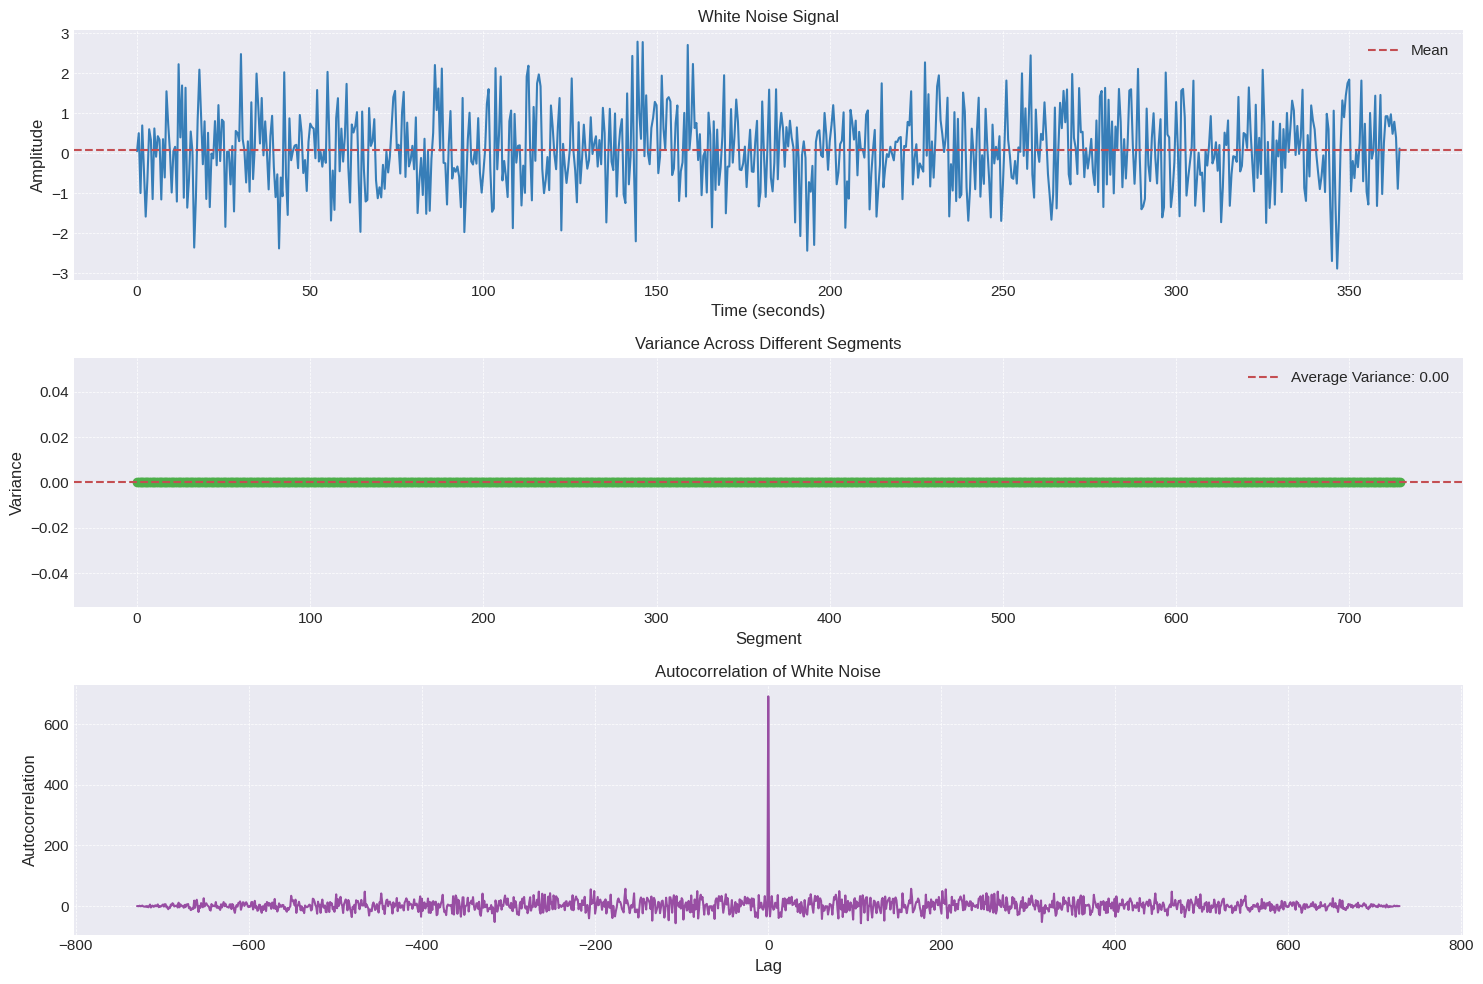

*Code*

In [ ]:
pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [ ]:
df.columns

Index(['spx', 'dax', 'ftse', 'nikkei'], dtype='object')

In [ ]:
# Load the data
raw_csv_data = pd.read_csv(file_path)

# make a copy

df = raw_csv_data.copy()

# check the columns datatypes

df.dtypes

# change the type for time column

df.date = pd.to_datetime(df.date, dayfirst=True)

df.dtypes

# set date column as index

df.set_index("date" , inplace = True)

df.head()

# set a predefined frequence and fill nan values if needed

df = df.asfreq("b")

df = df.fillna(method = "ffill")

# consider juat the "spx" column since we are working in univariate

columns = df.columns.tolist()

df['market_value'] = df.spx

df.drop(columns ,axis = 1 , inplace = True)

# slit manually the values

sizr = int(len(df)*0.8)

df, df_test = df.iloc[:size], df.iloc[size:]

print(f'the shape of df is:  {df.shape[0]} elements \nthe shape of df_test is:  {df_test.shape[0]} elements')

the shape of df is:  5015 elements 
the shape of df_test is:  1262 elements


**Checking for white noise pattern**

*the best way to check if our data are normal is to compare with generated white noise data from normal distribution*

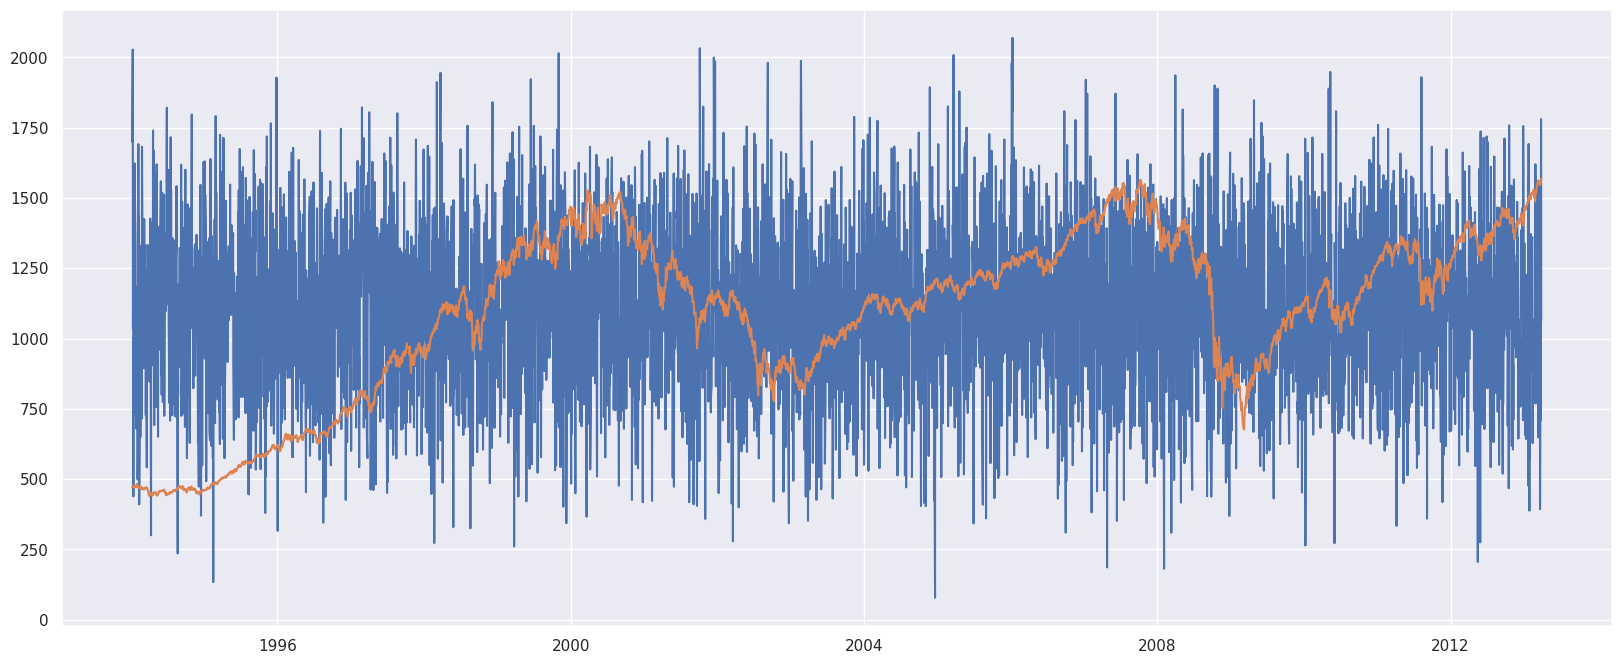

In [ ]:
#generate random data with the same property of our data

wn = np.random.normal(loc = df.market_value.mean() , scale = df.market_value.std() , size = len(df))
df["wn"] = wn
df.describe()

plt.figure(figsize=(20,8))
plt.plot(df.wn)
plt.plot(df.market_value)


*check also the requirements of white noise*


<ipython-input-70-29d776034b37>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


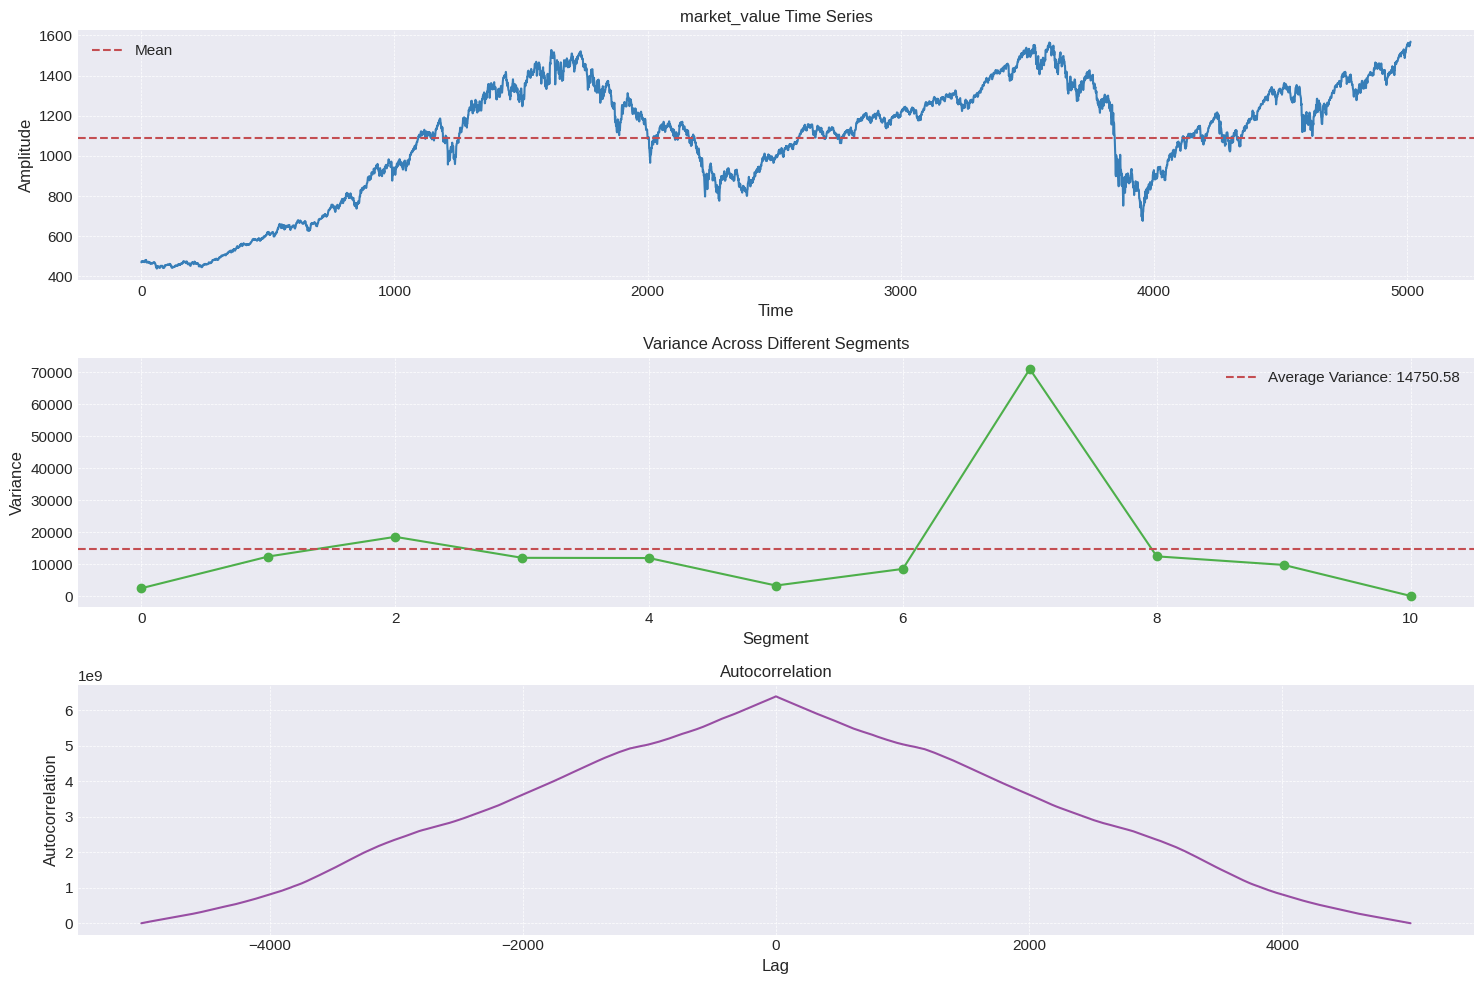

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate

def plot_white_noise_characteristics(df, column_name):
    """
    Plots the characteristics of white noise for a specified column in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to analyze.
    """
    # Enhanced settings for a professional look
    plt.style.use('seaborn-darkgrid')
    palette = plt.get_cmap('Set1')

    # Extracting the specified column
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame.")
        return
    data = df[column_name].dropna()

    # Time settings
    num_samples = len(data)
    time = np.linspace(0, num_samples , num_samples, endpoint=False)

    # Segmenting the signal and calculating variance for each segment
    segment_length = num_samples // 10
    variances = [np.var(data[i:i + segment_length]) for i in range(0, num_samples, segment_length)]

    # Computing Autocorrelation
    autocorr = correlate(data, data, mode='full')
    autocorr_lags = np.arange(-num_samples + 1, num_samples)

    # Plotting
    plt.figure(figsize=(15, 10))

    # Plot 1: Time Series
    plt.subplot(3, 1, 1)
    plt.plot(time, data, color=palette(1), linewidth=1.5)
    plt.title(f"{column_name} Time Series")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.axhline(y=np.mean(data), color='r', linestyle='--', label="Mean")
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot 2: Variance Across Segments
    plt.subplot(3, 1, 2)
    plt.plot(variances, color=palette(2), linewidth=1.5, marker='o')
    plt.title("Variance Across Different Segments")
    plt.xlabel("Segment")
    plt.ylabel("Variance")
    plt.axhline(y=np.mean(variances), color='r', linestyle='--', label=f"Average Variance: {np.mean(variances):.2f}")
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot 3: Autocorrelation
    plt.subplot(3, 1, 3)
    plt.plot(autocorr_lags, autocorr, color=palette(3), linewidth=1.5)
    plt.title("Autocorrelation")
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()


plot_white_noise_characteristics(df, 'market_value')


### Random Walk


A random walk time series can be defined using LaTeX notation as follows:

$X_t = X_{t-1} + \epsilon_t$

where :

-  **$X_{t}$**  

Represents the value of the time series at time $t$
-  **$X_{t-1}$**

Represents the value of the time series at the previous time point ${t-1}$
-  $\epsilon_t \sim \mathcal{N}(μ, \sigma^2)$

Represents a random error term at time $t$, often assumed to be independently and identically distributed $(i.i.d.)$




**This suggest that the best estimator of the $X_t$ is $X(t-1)$**

code:


In [ ]:
df

market_value           wn
date                                 
1994-01-07    469.900000  1177.074400
1994-01-10    475.270000   640.222180
1994-01-11    474.130000  1485.122829
1994-01-12    474.170000  1054.640877
1994-01-13    472.470000  1082.071209
...                  ...          ...
2013-03-22   1556.885902  1025.962588
2013-03-25   1551.691699  1356.173044
2013-03-26   1563.771968   885.935576
2013-03-27   1562.852709   564.442505
2013-03-28   1569.185872  1100.756307

[5015 rows x 2 columns]

In [ ]:

from google.colab import drive

drive.mount('/content/drive')

# Replace with your file's path
file_path = '/content/drive/MyDrive/RandWalk.csv'

# Reading the CSV file
rw = pd.read_csv(file_path)

# inspect datatypes

rw.head()
rw.dtypes

# change the type of data and put the index

rw.date = pd.to_datetime(rw.date)

rw.index= rw.date

del rw["date"]

rw.head()

# rw.asfreq("b")
# df.rw.isna().sum()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-410-b661b9aca8ec>:18: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  rw.date = pd.to_datetime(rw.date)


price
date                   
1994-07-01  1122.139662
1994-08-01  1135.238562
1994-09-01  1109.897831
1994-10-01  1080.347860
1994-11-01  1082.095245

In [ ]:
df["rw"] = rw.price
df.rw.fillna(method = 'bfill',inplace=True)

In [ ]:
# rw.asfreq("b")
df.rw.isna().sum()

0

In [ ]:
df.head()

market_value           wn           rw
date                                              
1994-01-07        469.90  1700.091295  1231.997040
1994-01-10        475.27  2028.198536  1116.460877
1994-01-11        474.13  1035.575583  1144.203545
1994-01-12        474.17  1246.342583  1179.172504
1994-01-13        472.47   438.422565  1067.146255

*Visual check*

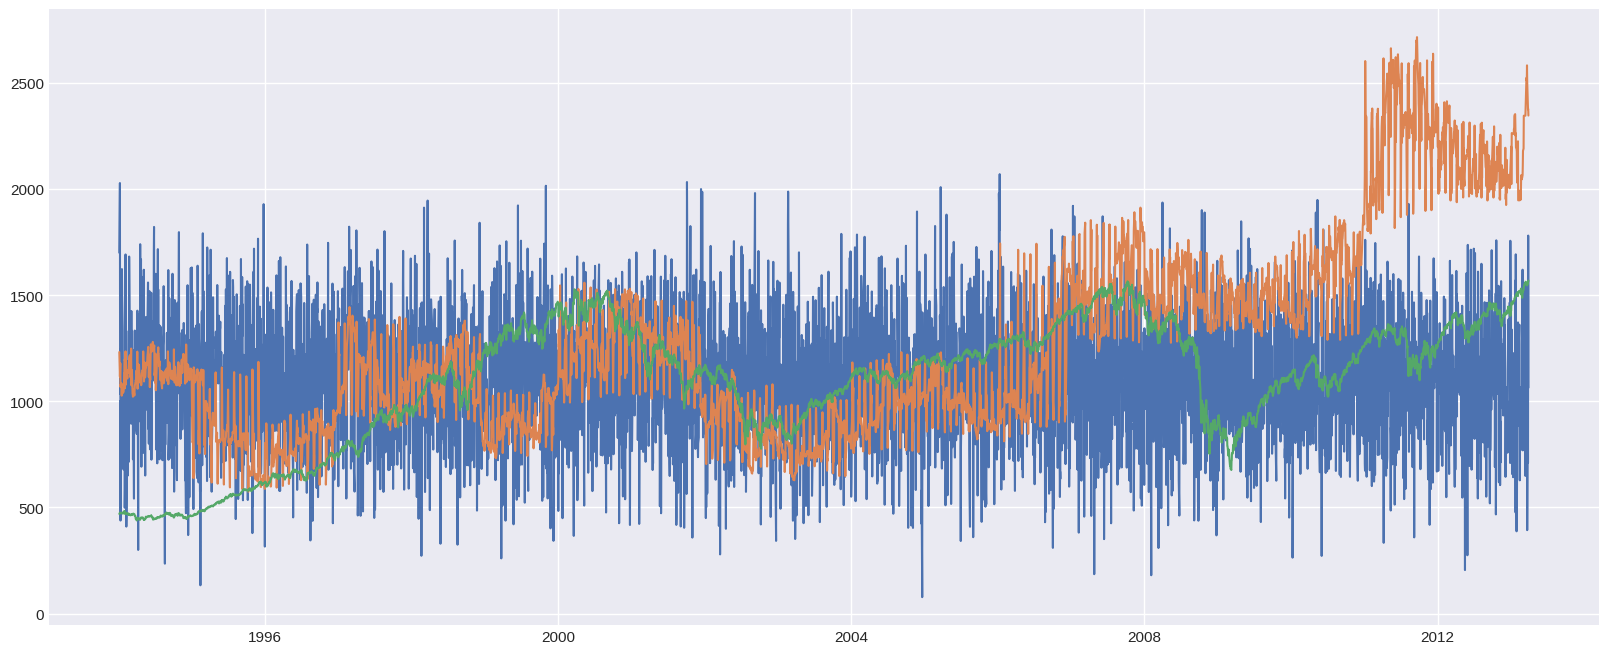

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df.wn)
plt.plot(df.rw)
plt.plot(df.market_value)

Random_walk and market_value appears to be very similar:

1. they have small variance between two consecutive timestep
2. Both have cyclical increasing and decreasing


<ipython-input-408-29d776034b37>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


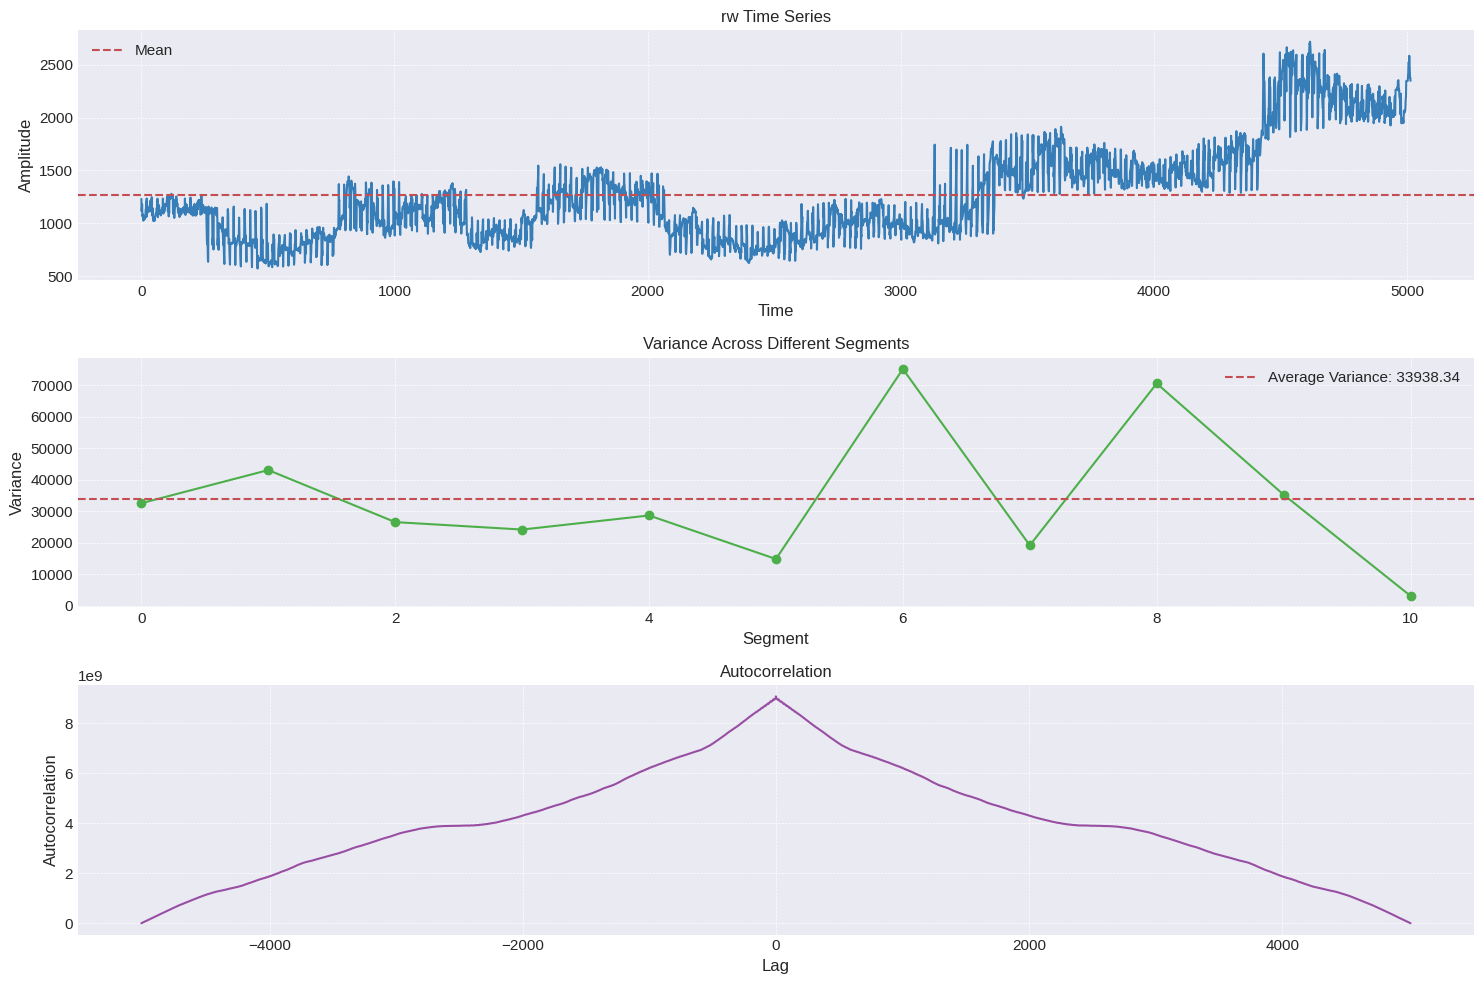

In [ ]:
plot_white_noise_characteristics(df, 'rw')

### Stationarity

There are two main definition of stationarity generally intended:

1. **Strict stationarity**

A time series $({X_t})$ is said to be **strictly stationary** if,
1. for all $(t)$and for any time shift $( k )$, when the joint distributions of ($X_{t_1}$, $X_{t_2}$, ... , $X_{t_n}$) and $(X_{t_1+k}, X_{t_2+k}, \ldots, X_{t_n+k})$ are **identical**, for all $( t_1, t_2,.., t_n )$.

In other terms:

`Any samples of data with the same size should have exactly the same distribution no matter t and lags`

---

NOTE:

In statistics is very rare to have such properties this is a formal definition


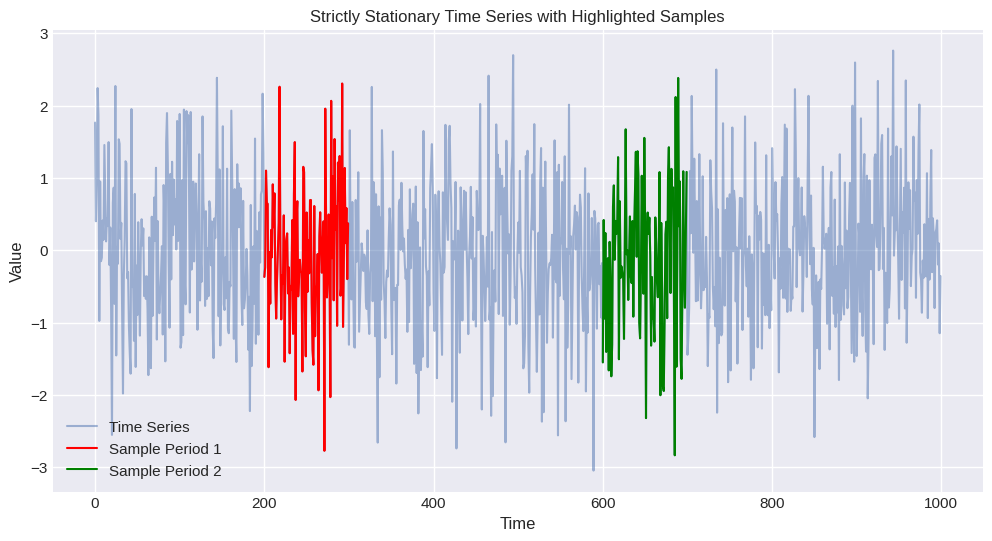

In [ ]:
#@title Strict Stationarity{ run: "auto", display-mode: "form" }


import matplotlib.pyplot as plt
import numpy as np

# Example of a strictly stationary time series

np.random.seed(0)
mean = 0
variance = 1
time_series_length = 1000

# Generating the time series
time_series = np.random.normal(mean, np.sqrt(variance), time_series_length)

# Selecting two different time periods from the series
sample_period1 = time_series[200:300]
sample_period2 = time_series[600:700]

# Plotting the entire time series and highlighting the two samples
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Time Series', alpha=0.5)
plt.plot(range(200, 300), sample_period1, label='Sample Period 1', color='red')
plt.plot(range(600, 700), sample_period2, label='Sample Period 2', color='green')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Strictly Stationary Time Series with Highlighted Samples')
plt.legend()
plt.show()


####  **Covariance Stationarity (Weak Stationarity):**

A time series ${X_t}$ is *covariance stationary* (or weakly stationary) if it satisfies the following conditions:
1. The mean of ${X_t}$ is constant over time: $E[X_t]=\mu$, independent of t.

2. The variance of $X_t$ is finite and constant over time: $Var(X_t)$ = $\sigma^2 $, independent of t.

3.  The autocovariance:

 $\gamma_k$ $=$ $\frac{1}{N}$ $\sum_{t=1}^{N-k}$ $(X_t - \mu)$ $(X_{t+k} - \mu)$


 consistent between periods having identical distance one another: It means that $(Cov(X_t, X_{t+k}))$ depends only on the lag $( k )$ and not on the time $( t )$: $( Cov(X_t, X_{t+k})$ = $\gamma_k$).

In other (more simple terms) terms it implies that:

` taking  samples of data with the same size (fixed lags) should have the same covariances no matter the starting point (indipendent from t)`

$Cov(x1,x4)$ = $Cov(x3,x6)$  since they are 3 distance from one to another one



---


NOTE:

*White noise has a type of Covariance / weak stationarity*

${cov}(X{n},X{n+k} )$ = $\rho_{X{n},X{n+k}}$ $\cdot$ $\sigma_X{n}$ $\cdot$ $\sigma_X{n+k}$

$\rho_{X{n},X{n+k}}$ = 0  `conditions of white noise`

${cov}(X{n},X{n+k} )$  = 0


### Determining Weak Form of stationarity in Time series

**Stationary or Non stationaty?*

`Dickey-Fuller test`

This test allows us to check if the process is stationary or non stationary (have some dipendencies)

$H{0}$ : One lag autocorrelation  ${Φ}$ < 1

$H{1}$ : One lag autocorrelation  ${Φ}$ > 1


**STATIONARY PROCESS**
${Test statistic < critical value from DF table => reject -H{0}- hypothesis}$

**NON STATIONARY PROCESS**
${Test statistic > critical value from DF table => reject -H{1}- hypothesis}$



In [ ]:
#implement it

#import adfuller test from statstools library already imported

sts.adfuller(df.market_value)

# (-1.7116458773955217,            t statistics
#  0.42512237986924584,            p-value  there is roughly the 40% to not reject the null hypothesis
#  18,                             number of lags  there is some auto correlation going till 18
#  4996,                           number of observation used in the analysis
#  {'1%': -3.4316595802782865,     % CRITICAL VALUES : could be used as level of significance
#   '5%': -2.8621186927706463,      ""
#   '10%': -2.567078038881065},     ""
#  39859.99879833516)              MIC maximized information criteria (apparent autocorrelation) lower is better to make prediction from past to futur

# There are not relevant stationinarity

(-1.7116458773955217,
 0.42512237986924584,
 18,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 39859.99879833516)

In [ ]:
# STATIONARY WHITE NOISE
sts.adfuller(df.wn)

(-51.608865049824274,
 0.0,
 1,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 70648.87415308405)

In [ ]:
# NON STATIONARY RANDOM WALK
sts.adfuller(df.rw)

(-0.2530544263492279,
 0.9318950818491993,
 23,
 4991,
 {'1%': -3.4316608928957413,
  '5%': -2.862119272677694,
  '10%': -2.5670783475882715},
 58532.40063194046)

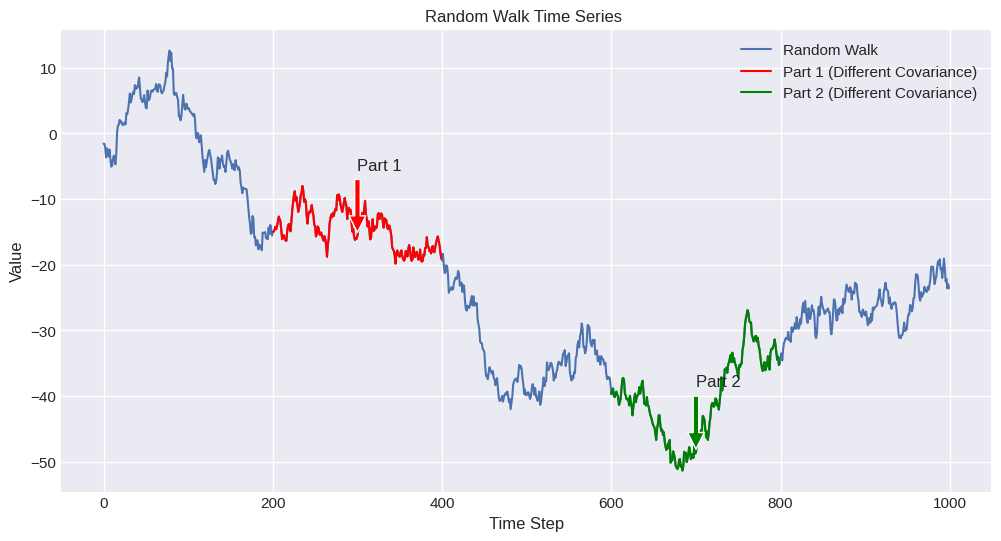

In [ ]:
#@title Random Walk Time series and stationarity{ run: "auto", display-mode: "form" }
# Number of steps
n = 1000

# Generate random walk
np.random.seed(50)
steps = np.random.standard_normal(n)
random_walk = np.cumsum(steps)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(random_walk, label='Random Walk')

# Highlight two different parts of the time series
# Selecting two different parts randomly
part1 = range(200, 400)
part2 = range(600, 800)

plt.plot(part1, random_walk[200:400], color='red', label='Part 1 (Different Covariance)')
plt.plot(part2, random_walk[600:800], color='green', label='Part 2 (Different Covariance)')

# Annotations
plt.annotate('Part 1', xy=(300, random_walk[300]), xytext=(300, random_walk[300] + 10),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate('Part 2', xy=(700, random_walk[700]), xytext=(700, random_walk[700] + 10),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.title('Random Walk Time Series ')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()


### Seasonality:

**`Data will present similar patterns seasonally`**

Seasonality is made by three different effects:

1. Trend     (consistent pattern throughout the data)
2. Seasonal  (cyclical effects)
3. Residual  (Error of prediction)



#### Check seasonality in data

`**Naive decomposition**`

With this very simple type of decomposition we aspect linear relatinship among these 3 parts

types of Naive decomposition:

1. Additive

assumes that for any $t$

$observed = trend + seasonal + residual$


2. Multiplicative

assumes that for any $t$

$observed = trend ⋅ seasonal ⋅ residual$



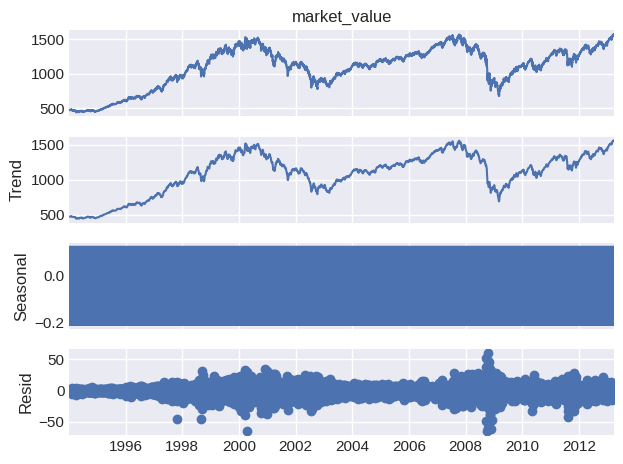

In [ ]:
# statstool library includes seasonal decomposition effects

from statsmodels.tsa.seasonal import seasonal_decompose

s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
# plot the graphs
s_dec_additive.plot()
plt.show()

`Interpret the results`

- The trend closely resembles the observed series
  the reason is that the decomposition function uses the previous values as trend-setter
  `the trend part of the decomposition explains most of the variability of the data`
- the seasonal plot shows that `there is no concrete
  cyclical pattern determined by using naive decomposition.`
- the residuals are the `error of our model   
  estimates` , as we can see the instability are relate in 2 periods 2000 and 2008 .com and houses prices bubbles in financial market


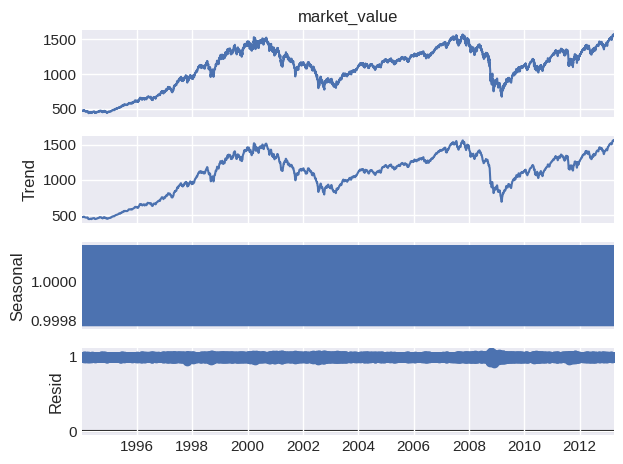

In [ ]:
# statstool library includes seasonal decomposition effects

from statsmodels.tsa.seasonal import seasonal_decompose

s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
# plot the graphs
s_dec_multiplicative.plot()
plt.show()

`NO SEASONALITY IN DATA`

Usage of additive ad multiplicative:

Additive Decomposition:


- Applicability: Additive models are typically used when the variations around the trend do not vary with the level of the time series. That means the seasonal and residual components remain relatively constant over time.
- Example: In a time series of monthly temperatures in a particular location, the observed value in a month could be decomposed into an overall increasing trend due to climate change (trend), a recurring pattern every year (seasonality), and random weather fluctuations (random error).


Multiplicative Decomposition:

- Applicability: Multiplicative models are used when the seasonal or random components are proportional to the level of the time series. In other words, the magnitude of seasonality or noise increases as the time series values increase.

- Example: Consider a company's sales data where the sales are growing over time. Here, the seasonal effect might be more significant during high-sales periods (like holidays) and less significant during low-sales periods. In this case, the seasonal variation is not constant over time but proportional to the trend

### Correlation between past and present [ACF - PACF]

Concept definition:

**Autocorrelation**

`It measures the level of resemblance (similarity) between a sequence from several periods ago and actual data.`

note: series from long period ago are also called LAGGED "delayed version of the original one"

In python we'll use ACF (auto correlation function) to perform fastly instead of calculating manually the correlation among different lags simoultaneously:

$
ACF = \frac{\sum_{t=1}^{n-k} (X_t - \bar{X})(X_{t+k} - \bar{X})}{\sum_{t=1}^{n} (X_t - \bar{X})^2}, \quad \text{for } k = 0, 1, 2,.., K
$

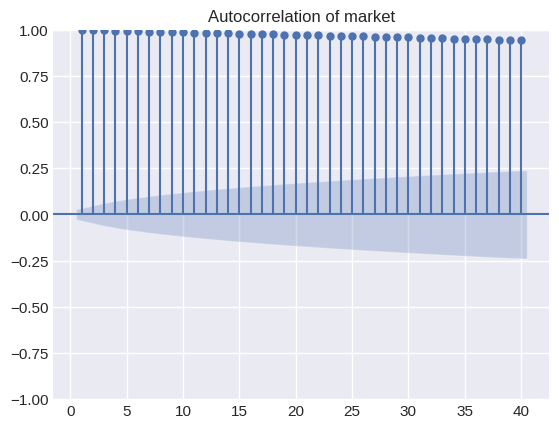

In [ ]:
# How to compute autocorrelation? ACF

import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(df.market_value , lags= 40 , zero =False , title = "Autocorrelation of market") #do not include the actual value
plt.show()


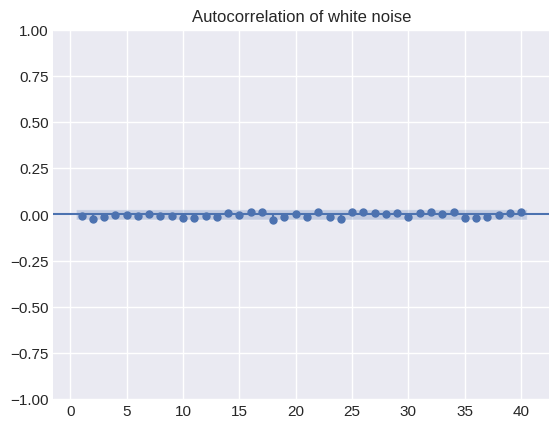

In [ ]:
#on white noise

# How to compute autocorrelation? ACF

import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(df.wn , lags= 40 , zero =False , title = "Autocorrelation of white noise") #do not include the actual value
plt.show()


**Partial Autocorrelation**

Data at time ${t}$ could be effected directly or indirectly from a lagged version of itself.


- Autocorrelation Function (ACF): This measures the correlation between a time series and lagged versions of itself. For example, ACF at lag 2 would compare the series with its own values shifted by two time points. It includes both the direct and indirect effects of past data points.

- Partial Autocorrelation Function (PACF): This measures the correlation between a time series and lagged versions of itself but after eliminating the variations already explained by the intervening comparisons. Essentially, PACF at lag 2 would measure the correlation between the series and its lagged version two time points back, but removing the effects of lags 1.

in simple words:

$\phi_{kk} = \frac{\text{Cov}(Y_t, Y_{t-k} | Y_{t-1}, \ldots, Y_{t-k+1})}{\sqrt{\text{Var}(Y_t | Y_{t-1}, \ldots, Y_{t-k+1}) \times \text{Var}(Y_{t-k} | Y_{t-1}, \ldots, Y_{t-k+1})}}$


`It cancel out all the additional channels a previous period value affects the present`

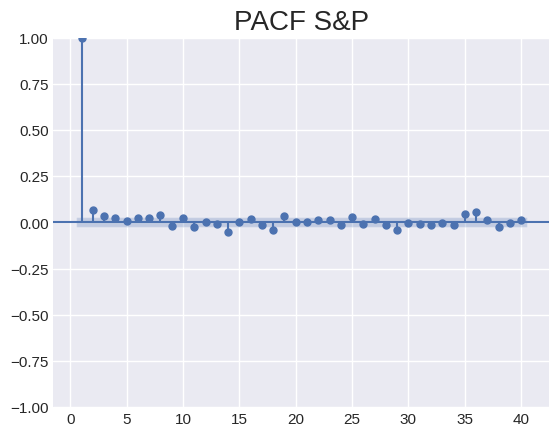

In [ ]:
#on white noise

# How to compute autocorrelation? ACF

import statsmodels.graphics.tsaplots as sgt

sgt.plot_pacf(df.market_value , lags= 40 , zero =False ,  method = ('ols') ) #do not include the actual value
plt.title("PACF S&P" , size = 20)
plt.show()


Here basically there is no significance for this PACF after 3 lag so it means that the difference are basically random

# Classical time series models

### Pick the right model

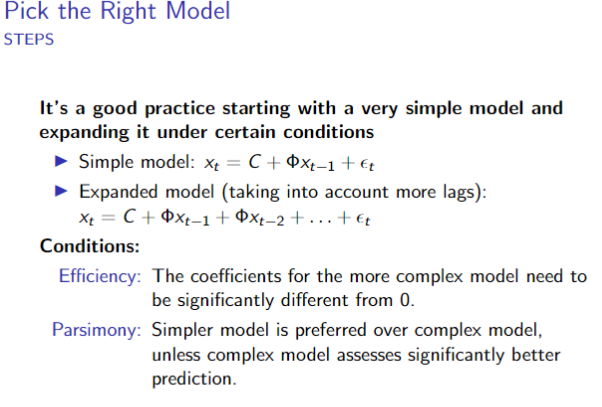



It's a good practice starting with a very simple model and expanding it under certain conditions

simple model  : $x{t} = C + Φx({t-1}) + ϵ({t})$

(taking in account more lags)
expanded mode : $x{t} = C + Φx({t-1}) +Φx({t-2})+ ...+ ϵ({t})$

conditions:

- **Efficiency :**

the coefficients for the more complex model need to be significantly different from 0 ---> the  estimators will be  different from 0

- **Parsimony:**

Simpler model >> Complex model

if Complex model assess significantly better prediction so we'll prefer this



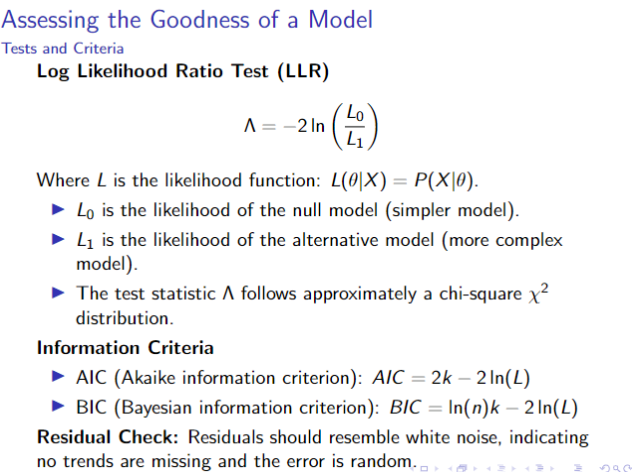


`How to assess the goodness of a model?`

**Log Likelihood Ratio Test (LLR)**

$\Lambda = -2 \ln \left( \frac{L_0}{L_1} \right)
$

Where L is the likelihood function:

$L(\theta | X) = P(X | \theta)$

in detail:


$L{0}$ is the likelihood of the null model (simpler model), and

$L{1}$ is the likelihood of the alternative model (more complex model).

The test statistic
{Λ} follows approximately a chi-square $Χ^2$ distribution with degrees of freedom $ŋ$ equal to the difference in the number of parameters between the two models

- **Information Criteria**

When we want to compare different models with the same complexity (same amount of lags we use **Information Criteria**:

- AIC (Akaike information criterion)

$\text{AIC} = 2k - 2\ln(L)
$


- BIC (Bayesian information criterion)

$\text{BIC} = \ln(n)k - 2\ln(L)$

Where:


1. $n$ is the number of observations.

2. $k$ is the number of estimated parameters in the model.

3. $L$ is the maximum value of the likelihood function for the model.

for simplicity (avoiding overfitting) we select model with lower Information criterias

The main difference between the two lies in the penalty term for the number of parameters: BIC penalizes model complexity more heavily, especially when the sample size ${n}$ is large

- **Residual should resemble White noise**

No trends are missing , the error is random.


| Step | Description |
|------|-------------|
| 1. Fit a Simple Model | Begin with a basic model, such as a simple AR(1) or MA(1), to establish a baseline for comparison. |
| 2. Comment on Coefficients | Discuss the statistical significance of the coefficients in the simple model. Look at p-values and confidence intervals to ensure the coefficients are not statistically insignificant. |
| 3. Analyze ACF or PACF | Investigate the Autocorrelation Function (ACF) or Partial Autocorrelation Function (PACF) to determine if a higher order AR or MA model is warranted. |
| 4. Compare Different Orders Using LLR Test | Use the Log-Likelihood Ratio (LLR) test to compare models of different orders. This helps in determining if a more complex model significantly improves the fit. |
| 5. Examine the Residuals | Analyze the residuals of the chosen model. The residuals should resemble a white noise process, indicating that the model has successfully captured the underlying process without leaving out significant trends or patterns. |


In [ ]:
#define a function for LLR test
from scipy.stats import chi2
def LLR_test(mod_1, mod_2 ,DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

### Autoregressive model [AR]

`A linear model , where current period values are a sum of past outcomes multiplied by a numric factors`

$x{t} = C + Φx({t-1}) + ϵ({t})$

where:

1. -1<$|{Φ}|$<1

 is any  numeric constant by which we multiply the lagged variable

 out of these ranges the estimates will explode or squish to 0

- For ${x(2)}$->
$x(2)$ = 1.3 $x1$
- For ${x(3)}$->
$x(3)$ = ${1.3^2}$ ${x1}$

- ...
- For ${x(n)}$ ->
$x(n)$ = ${1.3^n}$ ${x1}$


2. $ϵ({t})$

the difference between prediction and actual

**note:**

`we should establish the correct number of lags by taking a look to ACF and PACF `

**Checking the current amount of lags we need**


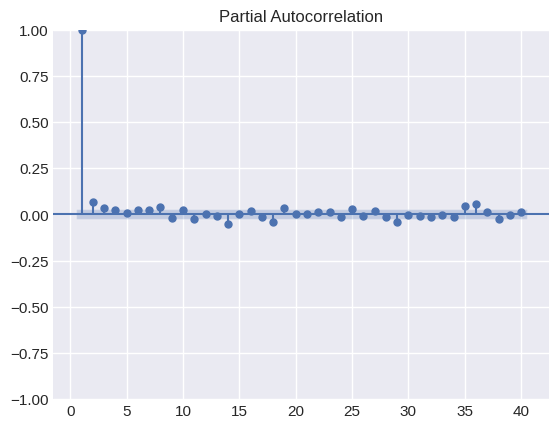

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt

# Simulated Data (since df.market_value and df.wn are not available)
# Normally you would use your own DataFrame 'df' with columns 'market_value' and 'wn'
import numpy as np



# Plot PACF
sgt.plot_pacf(df.market_value, lags=40, zero=False, method='ols')


plt.show()


#### 1-order Autoregressive

**Fitting AR model on our data**

Once we have established that lags>25 are not significant for PACF we fit the model until this threshold

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ar_1 = ARIMA(df.market_value , order = (1,0,0))  #SIMPLE AR(1) model

# # order (1,0) establish that we are looking at one past value at time and we are not considering residuals

results_ar_1 = model_ar_1.fit()

results_ar_1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -20075.103
Date:                Wed, 29 Nov 2023   AIC                          40156.205
Time:                        15:54:29   BIC                          40175.766
Sample:                    01-07-1994   HQIC                         40163.060
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.0559    167.296      6.522      0.000     763.162    1418.950
ar.L1          0.9992      0.001   1689.063      0.000       0.998       1.000
sigma2       175.3637      1.773     98.908      0.000     171.889     178.839
===================================================================================
Ljung-Box (L1) (Q):                  24.33   Jarque-Bera (JB):              7461.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**fOCUS ON THE LOWER PART**

$x_t = C + Φx({t-1}) + ϵ({t})$


coef	std err	z	P>|z|	[0.025	0.975]

const	1091.0559	167.296	6.522	0.000	763.162	1418.
950         # constant

ar.L1	0.9992	0.001	1689.063	0.000	0.998	1.000              # coefficient of 1lag variable

`So the coefficients are statistically significant since p-val is 0 , we can apply to higher dimensionality in terms of lag, rendering a more complex model`

#### Autoregressive model with higher dimensionality

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ar_2 = ARIMA(df.market_value , order = (2,0,0))  #SIMPLE AR(1) model

# # order (1,0) establish that we are looking at one past value at time and we are not considering residuals

results_ar_2 = model_ar_2.fit()

results_ar_2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -20063.085
Date:                Wed, 29 Nov 2023   AIC                          40134.169
Time:                        15:54:34   BIC                          40160.250
Sample:                    01-07-1994   HQIC                         40143.309
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.0489    226.914      4.808      0.000     646.306    1535.792
ar.L1          0.9304      0.009     99.014      0.000       0.912       0.949
ar.L2          0.0691      0.009      7.365      0.000       0.051       0.087
sigma2       174.5118      1.770     98.584      0.000     171.042     177.981
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              7462.41
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### LOG-Likelihood-Ratio test

In this section LLR test will be examinated in order to evaluate how many lags include and how much a complex model perform  better then a simpler model

In [ ]:
LLR_test(model_ar_1 , model_ar_2)

0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ar_2 = ARIMA(df.market_value , order = (2,0,0))  #SIMPLE AR(1) model

# # order (1,0) establish that we are looking at one past value at time and we are not considering residuals

results_ar_2 = model_ar_2.fit()


model_ar_3 = ARIMA(df.market_value , order = (3,0,0))  #SIMPLE AR(1) model

# # order (1,0) establish that we are looking at one past value at time and we are not considering residuals

results_ar_3 = model_ar_3.fit()

print(results_ar_3.summary())

print(f'LLR test p-value = {str(LLR_test(model_ar_2 , model_ar_3))}' )

# IS NO



                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -20060.750
Date:                Wed, 29 Nov 2023   AIC                          40131.500
Time:                        15:54:40   BIC                          40164.101
Sample:                    01-07-1994   HQIC                         40142.924
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.0899    121.176      9.004      0.000     853.589    1328.591
ar.L1          0.9274      0.009     97.861      0.000       0.909       0.946
ar.L2          0.0371      0.012      3.176      0.0

Difference in log-likelihood test is significant -> we have to use more complex model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ar_3 = ARIMA(df.market_value , order = (3,0,0))  #SIMPLE AR(1) model

# # order (1,0) establish that we are looking at one past value at time and we are not considering residuals

results_ar_3 = model_ar_3.fit()


model_ar_4 = ARIMA(df.market_value , order = (4,0,0))  #SIMPLE AR(1) model

# # order (1,0) establish that we are looking at one past value at time and we are not considering residuals

results_ar_4 = model_ar_4.fit()

print(results_ar_4.summary())

print(f'LLR test p-value = {str(LLR_test(model_ar_3 , model_ar_4))}' )

# IS NO



                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -20059.686
Date:                Wed, 29 Nov 2023   AIC                          40131.371
Time:                        15:54:46   BIC                          40170.493
Sample:                    01-07-1994   HQIC                         40145.081
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.0899    123.091      8.864      0.000     849.837    1332.343
ar.L1          0.9267      0.009     97.751      0.000       0.908       0.945
ar.L2          0.0363      0.012      3.097      0.0

We have now more values in the table:

-We can reject the null hypothesis for lags > 3 since the p-value is higher than 0.005 critical values.

`The prices of 3 days ago doesn't not effect current price`

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ar_4 = ARIMA(df.market_value , order = (4,0,0))  #SIMPLE AR(1) model

# # order (1,0) establish that we are looking at one past value at time and we are not considering residuals

results_ar_4 = model_ar_4.fit()


model_ar_5 = ARIMA(df.market_value , order = (5,0,0))  #SIMPLE AR(1) model

# # order (1,0) establish that we are looking at one past value at time and we are not considering residuals

results_ar_5 = model_ar_5.fit()

print(results_ar_5.summary())

print(f'LLR test p-value = f{str(LLR_test(model_ar_4 , model_ar_5))}' )





                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -20059.606
Date:                Wed, 29 Nov 2023   AIC                          40133.211
Time:                        15:54:52   BIC                          40178.853
Sample:                    01-07-1994   HQIC                         40149.206
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.0899    123.696      8.821      0.000     848.651    1333.529
ar.L1          0.9266      0.009     97.676      0.000       0.908       0.945
ar.L2          0.0362      0.012      3.088      0.0

**Conclusion**

A simpler model is worth till order 3 , more lags will signify not statistical valence of the coefficients and rejecting the null hypothesis of LLR test

#### Analize the residuals

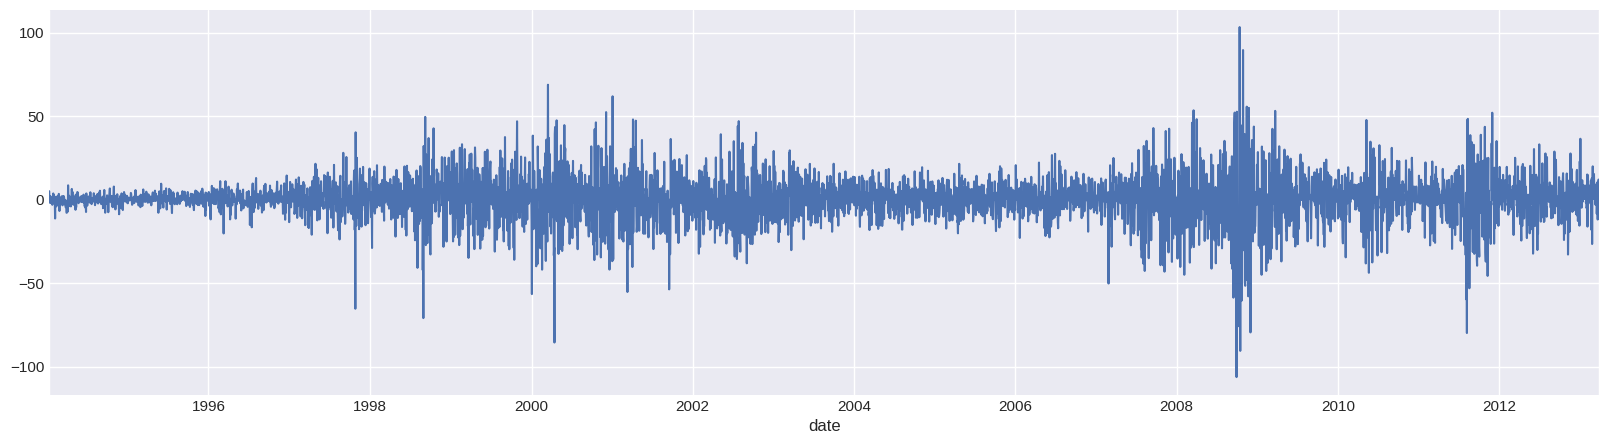

In [ ]:
df["res_price"] = results_ar_2.resid
df.res_price[1:].plot(figsize=(20,5))
plt.title("")
plt.show()

#### Normalization in time series

In case of time series when we normalize we basically map every value of sample space to the percentage of the first value of the set, rendering much easier to compare different time series

In [ ]:
# We can use a benchmark

benchmark = df.market_value.iloc[0]

df['norm'] = df.market_value.div(benchmark).mul(100)

# or methodology like min max scaler standard scaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

df["minmax_norm"] = mmscaler.fit_transform(df[["market_value"]])

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df["std_norm"] = sc.fit_transform(df[["market_value"]])

In [ ]:
df.head()

We come to the conclusion that model_ar_2 is the best model from LLR

In [ ]:
df['res_price']  = results_ar_2.resid

In [ ]:
df.res_price.describe()

Since for having a good prediction we need that the residual follow a stationary process apply Dickey fuller test

In [ ]:
sts.adfuller(df.res_price)

p-value is equal to 0 -> so the series is stationary

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot ACF
sgt.plot_acf(df.res_price, lags=40, zero=False, ax=axes[0], title="Autocorrelation of Market Value")
axes[0].set_title("Autocorrelation of Market Value", size=20)

# Plot PACF
sgt.plot_pacf(df.res_price, lags=40, zero=False, method='ols', ax=axes[1])
axes[1].set_title("PACF of White Market values", size=20)

# Display the plots
plt.tight_layout()
plt.show()

plot the values of the residuals in order to check if this is similar to white noise series

In [ ]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("")
plt.show()

A ${moving average}$ (MA) model in time series analysis expresses the current value of a series as a linear combination of past error terms (or residuals). The formulation of an MA model of order $q$, denoted as $\text{MA}(q)$, is given by:

$
X_t = \mu  + \sum_{i=1}^{q} \theta_i \epsilon_{t-i} + \epsilon_t
$

where:
- $X_t$ is the value of the time series at time $t$,
- $\mu$ is the mean of the series,
- $\epsilon_t$ is the error term (residual) at time $t$,
- $\theta_i$ are the parameters of the model,
- $q$ is the order of the MA model, indicating the number of lagged error terms included.

In this model, each value of the series is essentially a function of the current and past random shocks (errors) in the series. The residuals $\epsilon_t$ are assumed to be white noise with a mean of zero and a constant variance.

requirements:

-1<$Θ$<1   -> for the same reason when discussing AR model to compound the effect of exploding magnitude

**Differences between AR and MA model:**

- AR relies on **PACF**
The AR model is based on the idea that the current value of the series is related to its previous values.

- MA relies on **ACF**

In contrast to AR, the MA model suggests that the current value of the series is a function of the past forecast errors (the differences between past actual values and forecasted values).


`Dependency:`
1. AR relies on the actual previous values (thus needing PACF to understand this relationship without confounding effects)
2.  MA relies on the deviation of past forecasts from actual values (thus using ACF to see how these errors are correlated over time)


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt

# Simulated Data (since df.market_value and df.wn are not available)
# Normally you would use your own DataFrame 'df' with columns 'market_value' and 'wn'
import numpy as np


# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot ACF
sgt.plot_acf(df.market_value, lags=10, zero=False, ax=axes[0], title="Autocorrelation of Market Value")
axes[0].set_title("Autocorrelation of Market Value", size=20)

# Plot PACF
sgt.plot_pacf(df.market_value, lags=40, zero=False, method='ols', ax=axes[1])
axes[1].set_title("PACF of White Market values", size=20)

# Display the plots
plt.tight_layout()
plt.show()


MA model

In [ ]:
model_price_ma_1 = ARIMA(df.market_value[1:],order = (0,1,0))

results_price_ma_1 = model_price_ma_1.fit()
results_price_ma_1.summary()

In [ ]:
model_price_ma_10 = ARIMA(df.market_value[1:],order = (0,10,0))

results_price_ma_10 = model_price_ma_1.fit()
results_price_ma_10.summary()

#### Autoregressive model for Non stationary process



The predictive power of AR models comes from the assumption that how past values relate to future values remains consistent over time. If the time series is non-stationary, this relationship changes, making predictions inaccurate.

`What could we do?`

**TRANSFORM THE DATA SO THAT FITS THE STATIONARY ASSUMPTION**

In [ ]:
df.head()

market_value           wn           rw   res_price
date                                                          
1994-01-07        469.90  1700.091295  1231.997040 -621.148906
1994-01-10        475.27  2028.198536  1116.460877    4.998872
1994-01-11        474.13  1035.575583  1144.203545   -1.111663
1994-01-12        474.17  1246.342583  1179.172504   -0.381873
1994-01-13        472.47   438.422565  1067.146255   -2.040361

Use Returns instead of prices that are not sttionary

$r_t=\left( \frac{P_t - P_{t-1}}{P_{t-1}} \right)*100
$




In [ ]:
#in python there is a function called pct_change

df["returns"] = df.market_value.pct_change(1).mul(100)    # it return the percentage change between the previous price and next price

df.head()

market_value           wn           rw   res_price   returns
date                                                                    
1994-01-07        469.90  1700.091295  1231.997040 -621.148906       NaN
1994-01-10        475.27  2028.198536  1116.460877    4.998872  1.142796
1994-01-11        474.13  1035.575583  1144.203545   -1.111663 -0.239864
1994-01-12        474.17  1246.342583  1179.172504   -0.381873  0.008437
1994-01-13        472.47   438.422565  1067.146255   -2.040361 -0.358521

We'll have 1 missing value at beginning since it's not possible to calculate the return with a previous , we simply remove the first price

In [ ]:
df = df.iloc[1:]

**Check the ADF test with return**
It represent a stationary process

In [ ]:
sts.adfuller(df.returns)

(-17.022937279715936,
 8.431362229164352e-30,
 17,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 16021.164604260335)

### Moving average in time series [MA]

A ${moving average}$ (MA) model in time series analysis expresses the current value of a series as a linear combination of past error terms (or residuals). The formulation of an MA model of order $q$, denoted as $\text{MA}(q)$, is given by:

$
X_t = \mu  + \sum_{i=1}^{q} \theta_i \epsilon_{t-i} + \epsilon_t
$

where:
- $X_t$ is the value of the time series at time $t$,
- $\mu$ is the mean of the series,
- $\epsilon_t$ is the error term (residual) at time $t$,
- $\theta_i$ are the parameters of the model,
- $q$ is the order of the MA model, indicating the number of lagged error terms included.

In this model, each value of the series is essentially a function of the current and past random shocks (errors) in the series. The residuals $\epsilon_t$ are assumed to be white noise with a mean of zero and a constant variance.

requirements:

-1<$Θ$<1   -> for the same reason when discussing AR model to compound the effect of exploding magnitude

**Differences between AR and MA model:**

- AR relies on **PACF**
The AR model is based on the idea that the current value of the series is related to its previous values.

- MA relies on **ACF**

In contrast to AR, the MA model suggests that the current value of the series is a function of the past forecast errors (the differences between past actual values and forecasted values).


`Dependency:`
1. AR relies on the actual previous values (thus needing PACF to understand this relationship without confounding effects)
2.  MA relies on the deviation of past forecasts from actual values (thus using ACF to see how these errors are correlated over time)


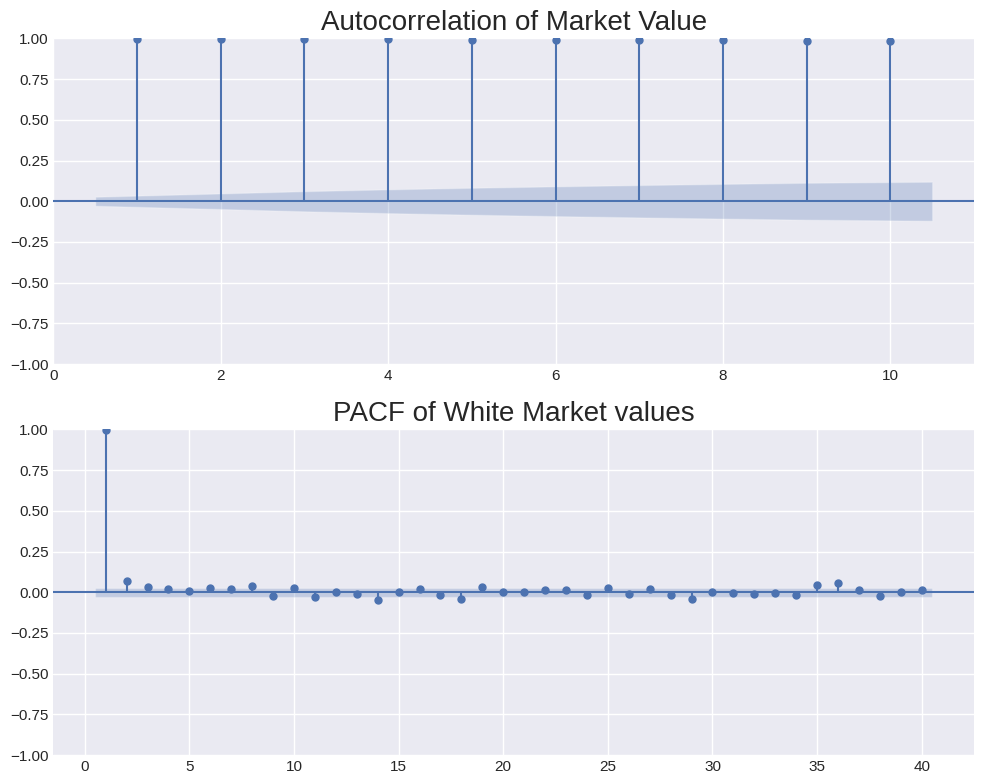

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt

# Simulated Data (since df.market_value and df.wn are not available)
# Normally you would use your own DataFrame 'df' with columns 'market_value' and 'wn'
import numpy as np


# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot ACF
sgt.plot_acf(df.market_value, lags=10, zero=False, ax=axes[0], title="Autocorrelation of Market Value")
axes[0].set_title("Autocorrelation of Market Value", size=20)

# Plot PACF
sgt.plot_pacf(df.market_value, lags=40, zero=False, method='ols', ax=axes[1])
axes[1].set_title("PACF of White Market values", size=20)

# Display the plots
plt.tight_layout()
plt.show()


#### 1-order MA

In [ ]:
model_price_ma_1 = ARIMA(df.market_value[1:],order = (0,0,1))

results_price_ma_1 = model_price_ma_1.fit()
results_price_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5013
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -32266.223
Date:                Wed, 29 Nov 2023   AIC                          64538.445
Time:                        15:57:06   BIC                          64558.005
Sample:                    01-11-1994   HQIC                         64545.300
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1090.4732      4.927    221.311      0.000    1080.816    1100.131
ma.L1          0.9695      0.004    219.262      0.000       0.961       0.978
sigma2      2.282e+04    607.702     37.548      0.000    2.16e+04     2.4e+04
===================================================================================
Ljung-Box (L1) (Q):                4326.18   Jarque-Bera (JB):               377.79
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Higher order MA

In [ ]:
model_price_ma_10 = ARIMA(df.market_value[1:],order = (0,0,10))

results_price_ma_10 = model_price_ma_10.fit()
results_price_ma_10.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5013
Model:                ARIMA(0, 0, 10)   Log Likelihood              -29515.618
Date:                Wed, 29 Nov 2023   AIC                          59055.236
Time:                        15:58:01   BIC                          59133.474
Sample:                    01-11-1994   HQIC                         59082.654
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.3364     13.836     78.878      0.000    1064.219    1118.454
ma.L1          0.3029      0.023     13.345      0.000       0.258       0.347
ma.L2          0.4297      0.016     27.053      0.000       0.399       0.461
ma.L3          1.2878      0.016     82.379      0.000       1.257       1.318
ma.L4          0.9209      0.032     28.374      0.000       0.857       0.984
ma.L5          0.5788      0.015     38.748      0.000       0.550       0.608
ma.L6          1.5470      0.023     68.019      0.000       1.502       1.592
ma.L7          0.5379      0.028     19.547      0.000       0.484       0.592
ma.L8          0.3568      0.014     25.106      0.000       0.329       0.385
ma.L9          0.6730      0.015     44.905      0.000       0.644       0.702
ma.L10         0.4066      0.019     21.024      0.000       0.369       0.444
sigma2      9916.1234    340.875     29.090      0.000    9248.021    1.06e+04
===================================================================================
Ljung-Box (L1) (Q):                 247.68   Jarque-Bera (JB):                97.88
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(model_price_ma_1 , model_price_ma_10)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.0

In [ ]:
model_ret_ma_1 = ARIMA(df.returns[1:],order = (0,0,1))

results_ret_ma_1 = model_price_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5013
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -32266.223
Date:                Wed, 29 Nov 2023   AIC                          64538.445
Time:                        15:59:03   BIC                          64558.005
Sample:                    01-11-1994   HQIC                         64545.300
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1090.4732      4.927    221.311      0.000    1080.816    1100.131
ma.L1          0.9695      0.004    219.262      0.000       0.961       0.978
sigma2      2.282e+04    607.702     37.548      0.000    2.16e+04     2.4e+04
===================================================================================
Ljung-Box (L1) (Q):                4326.18   Jarque-Bera (JB):               377.79
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Autoregressive - moving average model [ARMA]

The ARMA (Autoregressive Moving Average) model is a combination of the AR (Autoregressive) and MA (Moving Average) models. It's typically denoted as ARMA(p, q), where 'p' is the order of the AR part and 'q' is the order of the MA part.

$X_t = c + \epsilon_t + \sum_{i=1}^{p} \phi_i X_{t-i} + \sum_{j=1}^{q} \theta_j \epsilon_{t-j}$

In this representation:

- $X_t$ is the current value of the series at time t.
- $c$ is a constant term.
- $\epsilon_t$ represents the white noise error term at time t.
- $\phi_i$ are the coefficients of the AR terms.
- $\theta_j$ are the coefficients of the MA terms.
- $X_{t-i}$ indicates the lagged values of the series.
- $\epsilon_{t-j}$ are the lagged forecast errors.


In this formula, the first sum represents the AR part, capturing the impact of previous values of the series, while the second sum represents the MA part, which models the impact of past errors. The ARMA model is powerful in capturing both autoregressive and moving average characteristics of a

in simple terms:

`$ϕ{i}$ will represent the importance of the values X(i) term for the "ith - lag" `

`$θ{i}$ will represent the importance of the error term ϵ(i) for the "ith - lag"`


#### 1-order ARMA

In [ ]:
model_ret_ar_1_ma_1 = ARIMA(df.returns[1:], order=(1,0,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5013
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8051.810
Date:                Wed, 29 Nov 2023   AIC                          16111.620
Time:                        15:59:05   BIC                          16137.699
Sample:                    01-11-1994   HQIC                         16120.759
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.015      2.048      0.041       0.001       0.061
ar.L1          0.6114      0.053     11.456      0.000       0.507       0.716
ma.L1         -0.6820      0.048    -14.145      0.000      -0.777      -0.588
sigma2         1.4542      0.013    108.546      0.000       1.428       1.480
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):             13551.34
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Conclusion**

- The constant values is similar to 0 since we are walking with the returns

- There is a positive tendency between past and present values

- There is a negative tendency between past and present errors

`is this combination better than a single one?`

In [ ]:
print("ARMA VS AR" ,LLR_test(model_ar_1, model_ret_ar_1_ma_1 ))
print("ARMA VS MA" ,LLR_test(model_ret_ma_1,model_ret_ar_1_ma_1 ))

ARMA VS AR 0.0
ARMA VS MA 0.001


#### Higher-Lag ARMA Models

In [ ]:
model_ret_ar_3_ma_3 = ARIMA(df.returns[1:], order=(3,0,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
LLR_test(model_ret_ar_1_ma_1, model_ret_ar_3_ma_3, DF = 4)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.114

In [ ]:
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5013
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -8048.091
Date:                Wed, 29 Nov 2023   AIC                          16112.181
Time:                        16:00:28   BIC                          16164.339
Sample:                    01-11-1994   HQIC                         16130.459
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.015      2.050      0.040       0.001       0.061
ar.L1          1.1922      0.059     20.220      0.000       1.077       1.308
ar.L2         -1.2158      0.065    -18.571      0.000      -1.344      -1.088
ar.L3          0.6545      0.053     12.247      0.000       0.550       0.759
ma.L1         -1.2656      0.056    -22.745      0.000      -1.375      -1.156
ma.L2          1.2666      0.065     19.522      0.000       1.139       1.394
ma.L3         -0.7075      0.050    -14.166      0.000      -0.805      -0.610
sigma2         1.4528      0.014    106.976      0.000       1.426       1.479
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             13321.25
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_3_ma_2 = ARIMA(df.returns[1:], order=(3,0,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5013
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -8051.377
Date:                Wed, 29 Nov 2023   AIC                          16116.754
Time:                        16:00:48   BIC                          16162.393
Sample:                    01-11-1994   HQIC                         16132.748
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0312      0.015      2.022      0.043       0.001       0.061
ar.L1          0.0070     74.512   9.35e-05      1.000    -146.034     146.048
ar.L2          0.4691     50.352      0.009      0.993     -98.219      99.158
ar.L3          0.0119      1.343      0.009      0.993      -2.621       2.645
ma.L1         -0.0834     74.512     -0.001      0.999    -146.125     145.958
ma.L2         -0.5022     56.053     -0.009      0.993    -110.364     109.359
sigma2         1.4540      0.014    105.691      0.000       1.427       1.481
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13735.31
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_2_ma_3 = ARIMA(df.returns[1:], order=(2,0,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5013
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -8050.989
Date:                Wed, 29 Nov 2023   AIC                          16115.979
Time:                        16:01:00   BIC                          16161.617
Sample:                    01-11-1994   HQIC                         16131.972
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.015      2.029      0.042       0.001       0.061
ar.L1         -0.1957      0.143     -1.368      0.171      -0.476       0.085
ar.L2          0.6021      0.142      4.253      0.000       0.325       0.880
ma.L1          0.1191      0.143      0.832      0.405      -0.162       0.400
ma.L2         -0.6476      0.148     -4.375      0.000      -0.938      -0.357
ma.L3          0.0093      0.015      0.619      0.536      -0.020       0.039
sigma2         1.4538      0.014    107.221      0.000       1.427       1.480
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13756.13
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(model_ret_ar_2_ma_3, model_ret_ar_3_ma_3)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/st

0.016

In [ ]:
model_ret_ar_3_ma_1 = ARIMA(df.returns[1:], order=(3,0,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5013
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -8051.165
Date:                Wed, 29 Nov 2023   AIC                          16114.331
Time:                        16:01:32   BIC                          16153.449
Sample:                    01-11-1994   HQIC                         16128.039
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.993      0.046       0.001       0.062
ar.L1          0.7114      0.097      7.331      0.000       0.521       0.902
ar.L2          0.0153      0.011      1.358      0.175      -0.007       0.037
ar.L3          0.0109      0.012      0.929      0.353      -0.012       0.034
ma.L1         -0.7881      0.096     -8.200      0.000      -0.976      -0.600
sigma2         1.4538      0.014    107.278      0.000       1.427       1.480
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13638.89
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1.0

In [ ]:
model_ret_ar_2_ma_2 = ARIMA(df.returns[1:], order=(2,0,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5013
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -8051.694
Date:                Wed, 29 Nov 2023   AIC                          16115.389
Time:                        16:01:46   BIC                          16154.508
Sample:                    01-11-1994   HQIC                         16129.098
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0312      0.015      2.045      0.041       0.001       0.061
ar.L1          0.1260      0.876      0.144      0.886      -1.592       1.844
ar.L2          0.3297      0.531      0.621      0.535      -0.711       1.370
ma.L1         -0.1990      0.878     -0.227      0.821      -1.919       1.521
ma.L2         -0.3578      0.595     -0.602      0.547      -1.524       0.808
sigma2         1.4542      0.014    107.157      0.000       1.428       1.481
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             13664.95
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_1_ma_3 = ARIMA(df.returns[1:], order=(1,0,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5013
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -8051.225
Date:                Wed, 29 Nov 2023   AIC                          16114.450
Time:                        16:01:52   BIC                          16153.569
Sample:                    01-11-1994   HQIC                         16128.159
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0312      0.016      1.994      0.046       0.001       0.062
ar.L1          0.7437      0.125      5.968      0.000       0.499       0.988
ma.L1         -0.8200      0.125     -6.582      0.000      -1.064      -0.576
ma.L2          0.0185      0.013      1.417      0.157      -0.007       0.044
ma.L3          0.0087      0.012      0.700      0.484      -0.016       0.033
sigma2         1.4539      0.014    107.340      0.000       1.427       1.480
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13657.86
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print("\n ARMA(3,2): \tLL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)
print("\n ARMA(1,3): \tLL = ", results_ret_ar_1_ma_3.llf, "\tAIC = ", results_ret_ar_1_ma_3.aic)


 ARMA(3,2): 	LL =  -8051.3770985360225 	AIC =  16116.754197072045

 ARMA(1,3): 	LL =  -8051.224927249265 	AIC =  16114.44985449853


#### Residuals for Returns

In [ ]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]

<ipython-input-460-538d1eb91fc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]


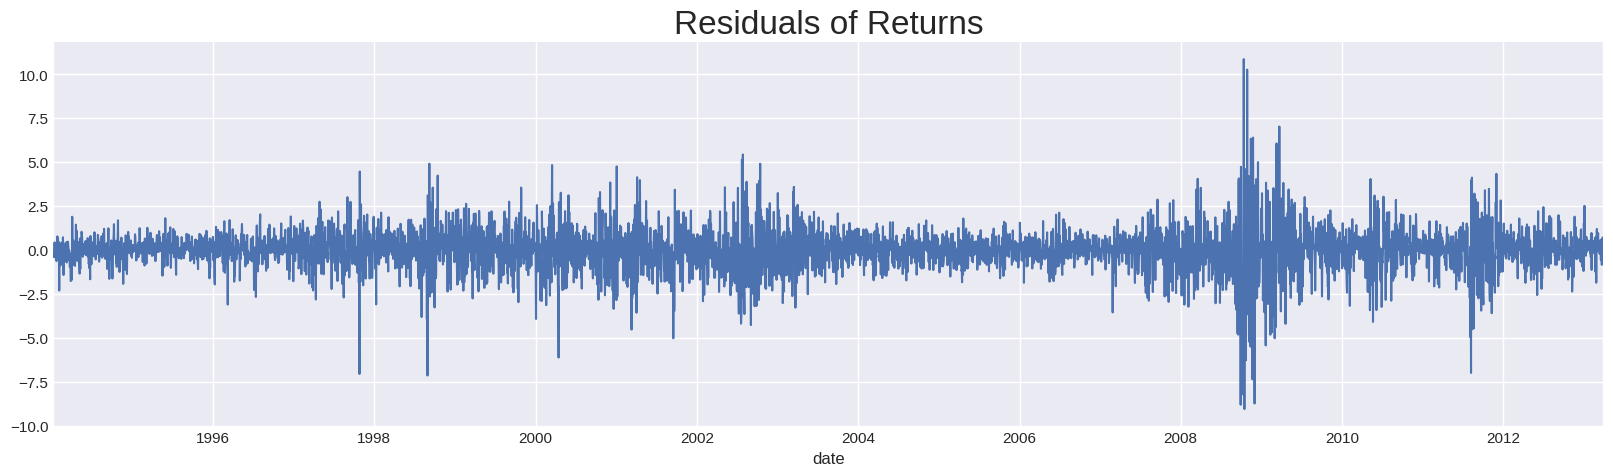

In [ ]:
df.res_ret_ar_3_ma_2.plot(figsize = (20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

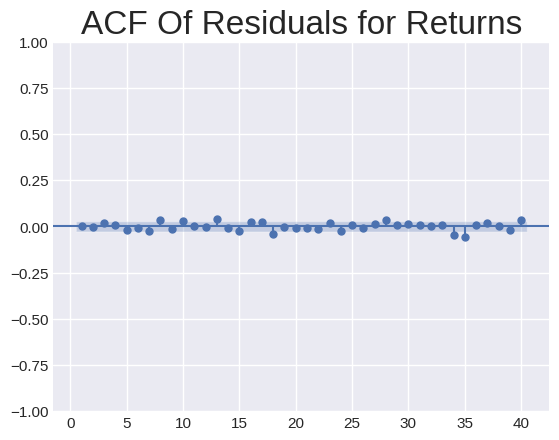

In [ ]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

###Auto-Regressive Integrated Moving Average [ARIMA]

ARIMA model have 3 order : $(p, d, q)$  : $AR-I-MA$

where:

$p$ represent AR

$d$ Integration order it represent the number of times that we need to integrate the time series to ensure stationarity

$Q$ represent MA


`Intuition`

1. Accounting for non seasonal difference between periods

e.g.

Prices should be $ΔP_t$ instead of $P$ (integrating the values of prices)

2. Construct the new time series and fit an ARMA model with (pq)


`Formulation`

$ΔP_t = c + Φ_1 ΔP_{t-1}+ θ_1 ϵ{t-1} + ϵ_t$

$ΔP_t$: difference between prices in $t$ it represents time series representing the disparities between consecutives periods

*in simple words:*

`ARIMA model is no more than ARMA performed onn newly generated stationary time series this stationarity could be assessed with different order of integration`



*Integration order*

If we create a time series $Q$ integrating the original prices [$P_t-P_(t-1)$]

second order arima calculates and applies ARMA on another time series $T$ calculated using consecutives values of $Q$ in the same way $T=Q_t - Q_{t-1}$

---
*Note:*

`ARIMA is not used for stationary series`
- It's more difficult to estimate the coefficient and computational expensive , it overcomplicates the estimation

`Data Friction`
For any integration we'll loose a single observation by the process of differentiating.

`Issues`

- Transform the data several times will cause lost
- Differentiate the values from 0 in the process of the differencing (hard)
This can lead to:
1. Converging failing
2. Numerical instability
- the margin of the threshold between significant and not significant becomes smaller
3. Lack of interpretability more differentiating i'll do



**Importing the relevant packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

**Importing the Data and Pre-processing**

In [ ]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [ ]:
df_comp['market_value']=df_comp.ftse

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#del df_comp['spx']
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

**Creating Returns**

In [ ]:
df['returns'] = df.market_value.pct_change(1)*100

#### Simple  ARIMA

In [ ]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Fri, 29 Nov 2019   AIC                          55215.333
Time:                        11:04:13   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

**Examination**

1. the differentiation doesn't effect the number of parameters we need to estimate (it has the same number of value of ARMA)

2. The differentiated values here have similar behaviour respect to return(remember how we calculated returns)



**Residuals of the simple ARIMA**

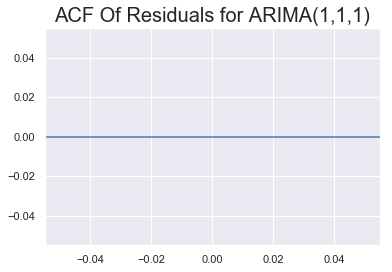

In [ ]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

**This is a break code , since from the integration we'll have Missing values values we cannot display these values**

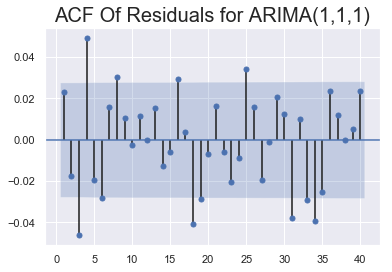

In [ ]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

Comment:

third and fourth lags seems capturing some patterns that our simple model is not capturing , to improve performances includes these lags increasing the order of the model

**Higher-Lag ARIMA Models**

remember to set enough starting point of the lags basically to be able to the model


Coefficient Initialization with start at lags:

In the process of estimating the AR coefficients $\phi_1, \phi_2, \phi_3$, the ${start\_ar\_lags}$ parameter plays a crucial role. When set to 5, it implies that:

- The estimation algorithm initially considers the first 5 lags of the series to obtain preliminary values of $\phi_1, \phi_2, \phi_3 \$.
- This setting does not alter the model structure but affects the optimization process for estimating AR coefficients.



In [ ]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags=5)

Results evaluation:

lllf: Log likelihood   

AIC : Akaike informative criterion

In [ ]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic) # Highest log likelihood and lowest AIC
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -27603.666412765113 	 AIC =  55215.332825530226
ARIMA(1,1,2):  	 LL =  -27600.081863116407 	 AIC =  55210.163726232815
ARIMA(1,1,3):  	 LL =  -27590.42403257934 	 AIC =  55192.84806515868
ARIMA(2,1,1):  	 LL =  -27599.80748784726 	 AIC =  55209.61497569452
ARIMA(3,1,1):  	 LL =  -27592.05537170055 	 AIC =  55196.1107434011
ARIMA(3,1,2):  	 LL =  -27590.660808977023 	 AIC =  55195.32161795405


**Check if adding ariable contribute positively with LLR test**

In [ ]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_3))) #higher complexity is necessary


LLR test p-value = 0.0


In [ ]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_1, results_ar_1_i_1_ma_3, DF = 2))) # higher complexity is necessary


LLR test p-value = 0.0


`ARIMA (1,1,3) is the best model`

**Examinate the residuals**

Remember that we need white noise

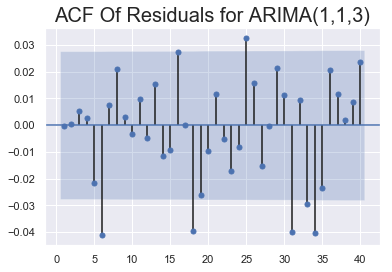

In [ ]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size=20)
plt.show()

**Fitting arima with higher dimension**

`Why?`

Analyzing the residuals we can see that at lags = 6 there is some possible pattern to capture

- arima (5,1,1) is solid because we have evaluated ARMA and the best value was (5,1)
- arima(6,1,3) is solid looking at the residuals


In [ ]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags=11)
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit(start_ar_lags=11)

In [ ]:
results_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.512
Method:                       css-mle   S.D. of innovations             58.932
Date:                Fri, 29 Nov 2019   AIC                          55189.024
Time:                        11:04:28   BIC                          55241.193
Sample:                    01-10-1994   HQIC                         55207.305
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5658      0.690      0.820      0.413      -0.787       1.919
ar.L1.D.market_value     0.4011      0.159      2.530      0.011       0.090       0.712
ar.L2.D.market_value    -0.0445      0.016     -2.856      0.004      -0.075      -0.014
ar.L3.D.market_value    -0.0543      0.017     -3.163      0.002      -0.088      -0.021
ar.L4.D.market_value     0.0586      0.019      3.069      0.002       0.021       0.096
ar.L5.D.market_value    -0.0581      0.014     -4.118      0.000      -0.086      -0.030
ma.L1.D.market_value    -0.4214      0.158     -2.659      0.008      -0.732      -0.111
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7609           -0.0000j            1.7609           -0.5000
AR.2            1.4633           -0.8605j            1.6975           -0.0846
AR.3            1.4633           +0.8605j            1.6975            0.0846
AR.4           -0.0790           -1.8393j            1.8410           -0.2568
AR.5           -0.0790           +1.8393j            1.8410            0.2568
MA.1            2.3733           +0.0000j            2.3733            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1):  \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t LL = ", results_ar_6_i_1_ma_3.llf, "\t AIC = ", results_ar_6_i_1_ma_3.aic)  # Highest log likelihood and lowest AIC

ARIMA(1,1,3):  	 LL =  -27590.42403257934 	 AIC =  55192.84806515868
ARIMA(5,1,1):  	 LL =  -27586.5118883202 	 AIC =  55189.0237766404
ARIMA(6,1,3):  	 LL =  -27583.565320401154 	 AIC =  55189.13064080231


**Compare the increasing of complexity if is worth it with LLR**

In [ ]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_3, results_ar_6_i_1_ma_3, DF = 5)))  #the complexity is rationalizes


LLR test p-value = 0.018


In [ ]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_5_i_1_ma_1, results_ar_6_i_1_ma_3, DF = 3))) # the complexity is not rationalized , is better to use lower complexity


LLR test p-value = 0.117


**look the residuals or ARIMA(5,1,1)**

Until lag 15 there is no relevant pattern lefted unattended

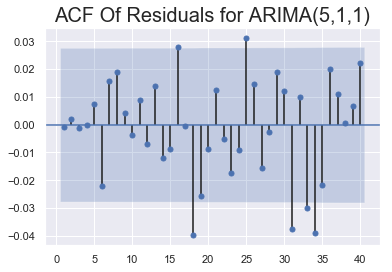

In [ ]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(5,1,1)", size=20)
plt.show()

#### ARIMA with Higher Levels of Integration

Since from the analysis of Arima(5,1,1,) we knew that is possible to capture patterns , try to modify the level of integration if we can capture it

In [ ]:
df['delta_prices']=df.market_value.diff(1)

<ipython-input-484-b2039f890a44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta_prices']=df.market_value.diff(1)


In [ ]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5013
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -20045.492
Date:                Wed, 29 Nov 2023   AIC                          40098.985
Time:                        17:02:27   BIC                          40125.064
Sample:                    01-11-1994   HQIC                         40108.124
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2179      0.169      1.291      0.197      -0.113       0.549
ar.L1          0.6075      0.063      9.718      0.000       0.485       0.730
ma.L1         -0.6758      0.057    -11.898      0.000      -0.787      -0.564
sigma2       174.0813      1.791     97.214      0.000     170.572     177.591
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):              7318.10
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               2.27   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
sts.adfuller(df.delta_prices[1:])

(-16.495935626404652,
 2.170699042790352e-29,
 17,
 4995,
 {'1%': -3.43165984259144,
  '5%': -2.8621188086591505,
  '10%': -2.5670781005730454},
 39846.86530245481)

In [ ]:
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(5,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()
results_ar_1_i_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5014
Model:                 ARIMA(5, 2, 1)   Log Likelihood              -20046.679
Date:                Wed, 29 Nov 2023   AIC                          40107.359
Time:                        17:03:16   BIC                          40152.996
Sample:                    01-10-1994   HQIC                         40123.352
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0729      0.010     -7.570      0.000      -0.092      -0.054
ar.L2         -0.0371      0.008     -4.846      0.000      -0.052      -0.022
ar.L3         -0.0226      0.009     -2.424      0.015      -0.041      -0.004
ar.L4         -0.0084      0.009     -0.936      0.349      -0.026       0.009
ar.L5         -0.0251      0.008     -3.092      0.002      -0.041      -0.009
ma.L1         -1.0000      0.011    -92.867      0.000      -1.021      -0.979
sigma2       174.1517      2.388     72.938      0.000     169.472     178.831
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7288.96
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.27   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Residual analysis

<ipython-input-492-ca918cfc0b97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]


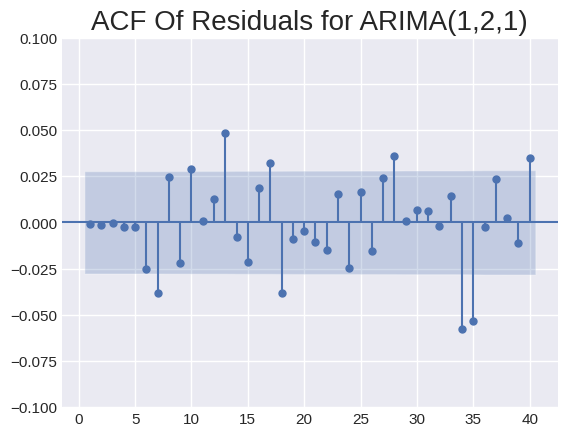

In [ ]:
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)",size=20)
yticks = [ -0.25, 0, 0.25]  # Example y-tick values
plt.ylim(-0.1, 0.1)
plt.show()

### Auto Regressive Integrated Moving Average with Exogenous variables [ARIMAX]

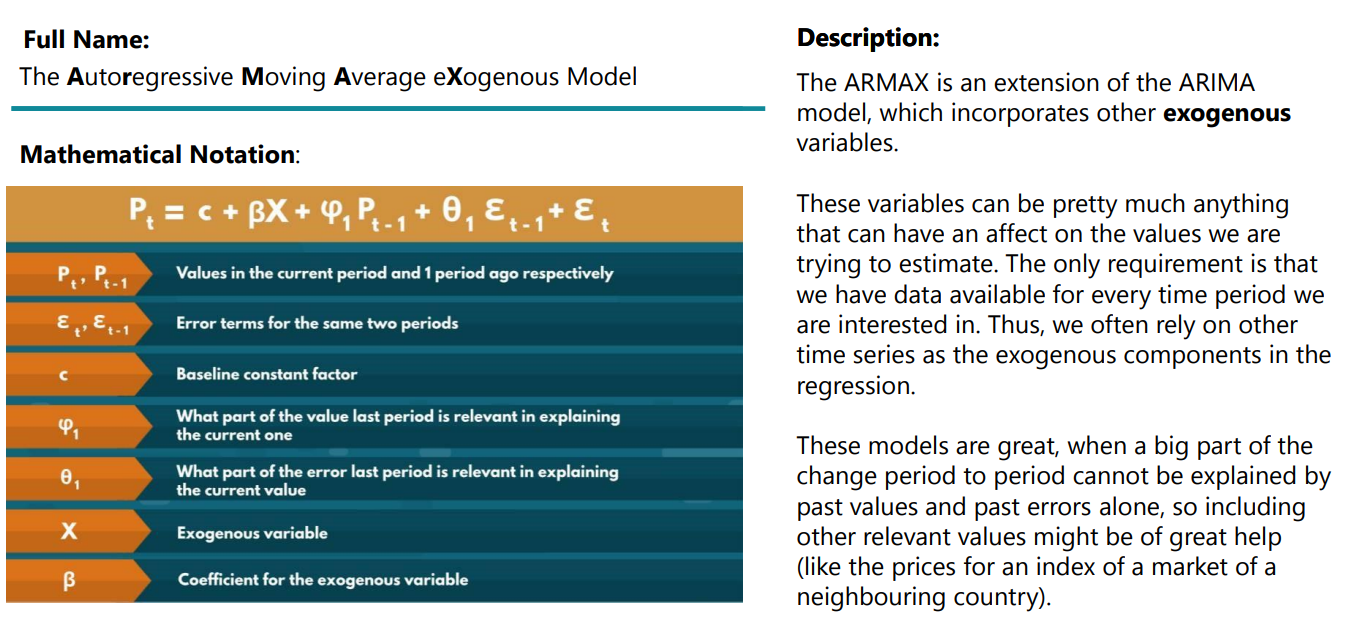

In [ ]:
df = pd.read_csv("Index2018.csv")
df.head()

date     spx      dax     ftse    nikkei
0  07/01/1994  469.90  2224.95  3445.98  18124.01
1  10/01/1994  475.27  2225.00  3440.58  18443.44
2  11/01/1994  474.13  2228.10  3413.77  18485.25
3  12/01/1994  474.17  2182.06  3372.02  18793.88
4  13/01/1994  472.47  2142.37  3360.01  18577.26

In [ ]:
df = pd.read_csv("Index2018.csv")

df["market_value"] = df.ftse

model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog = df.dax, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6269
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -31527.270
Date:                Wed, 29 Nov 2023   AIC                          63062.540
Time:                        17:46:22   BIC                          63089.513
Sample:                             0   HQIC                         63071.886
                               - 6269                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dax            0.5359      0.003    159.205      0.000       0.529       0.543
ar.L1          0.6802      0.087      7.817      0.000       0.510       0.851
ma.L1         -0.7209      0.083     -8.738      0.000      -0.883      -0.559
sigma2      1369.0462     14.748     92.826      0.000    1340.140    1397.953
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              3842.75
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**More exogenous**

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load your data
df = pd.read_csv("Index2018.csv")

# Assuming df has columns for ftse, dax, nikkei, and additional variables like spx, dow
df["market_value"] = df.ftse

# Including multiple exogenous variables
exog_vars = df[['dax', 'nikkei', 'spx']]  # Add more columns as needed

# Fit the ARIMA model with exogenous variables
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog=exog_vars, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()

# Display the summary
print(results_ar_1_i_1_ma_1_Xspx.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6269
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -31372.955
Date:                Wed, 29 Nov 2023   AIC                          62757.910
Time:                        17:50:02   BIC                          62798.369
Sample:                             0   HQIC                         62771.929
                               - 6269                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dax            0.4646      0.004    103.646      0.000       0.456       0.473
nikkei         0.0247      0.002     13.453      0.000       0.021       0.028
spx            0.6088      0.028     21.727      0.0

### Seasonal Auto Regressive Integrated Moving Average with Exogenous variables [SARIMAX]

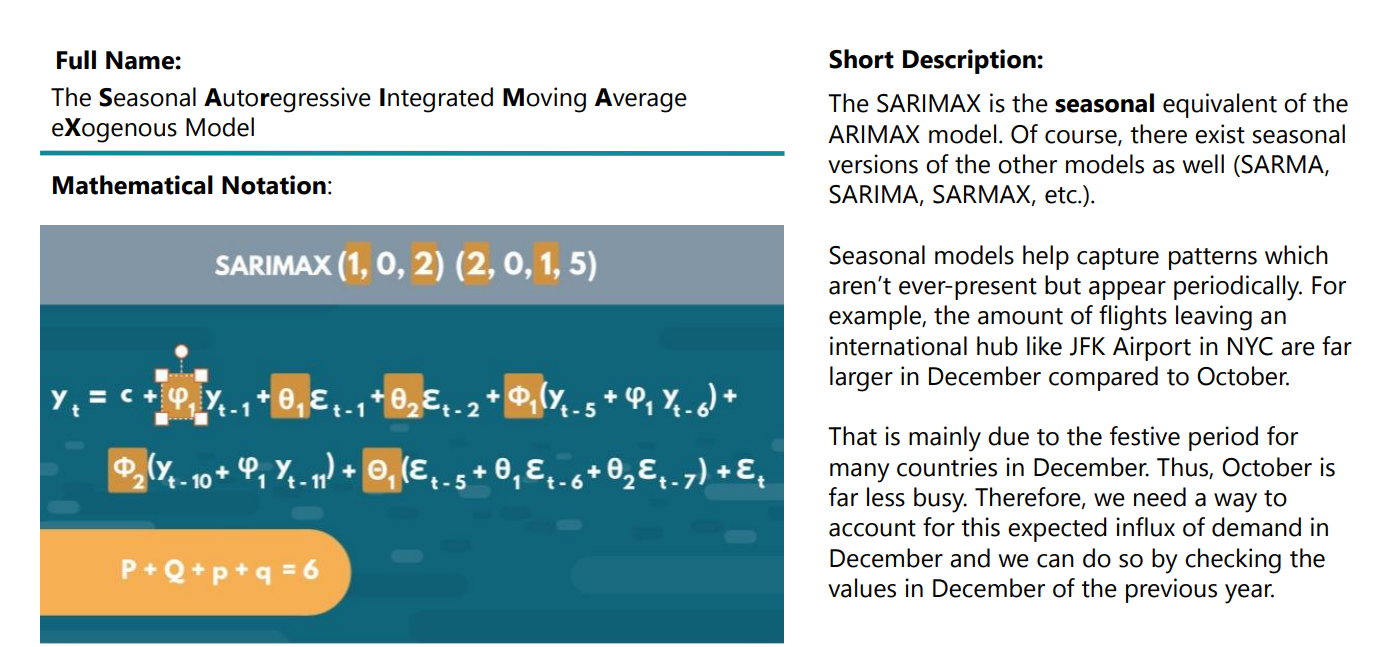

The Sarimax need 4 others orders:

$(p,d,q)(P,D,Q,s)$
- the first three are just seasonal variations of the arima orders $P,D,Q$
- the last one represent the length of the cycle $s$ (the number of periods need to pass before the tendency reappears s= 1 -> no seasonality

we need to specify the correct sesonal


`How it works?`

The seasonal [s] express how far the seasonal components are from the current period

e.g

SARIMAX(1,0.2)(2,0,1,5)

We are considering:

$X_{t-5} ; X_{t-10} ; ϵ_{t-5}$

estimates:

$Φ_1 , Φ_2 , θ_1$

- 2 cycles for $X$ values  P=2

- 1 cycle for ϵ_{t-5} Q=1


`We are starting from s and we are taking in account`

$[s...(sxP)^{th}] values$

both for seasonal integrated values and errors

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_sarimax = SARIMAX(df.market_value, exog = df.spx, order=(1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 6269
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -33259.021
Date:                           Wed, 29 Nov 2023   AIC                          66532.041
Time:                                   17:54:54   BIC                          66579.245
Sample:                                        0   HQIC                         66548.397
                                          - 6269                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.5724      0.030     85.925      0.000       2.514       2.631
ar.L1          1.0000      0.002    424.930      0.000       0.995       1.005
ma.L1         -0.2356      0.003    -76.589      0.000      -0.242      -0.230
ar.S.L5        0.9841      0.006    160.972      0.000       0.972       0.996
ar.S.L10       0.0159      0.004      4.360      0.000       0.009       0.023
ma.S.L5       -0.9999      0.016    -62.648      0.000      -1.031      -0.969
sigma2      2283.2492     15.833    144.211      0.000    2252.218    2314.281
===================================================================================
Ljung-Box (L1) (Q):                   5.11   Jarque-Bera (JB):              4730.15
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**More exogenous variables**

In [ ]:
model_sarimax = SARIMAX(df.market_value,exog=exog_vars, order=(1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 6269
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -31391.523
Date:                           Wed, 29 Nov 2023   AIC                          62801.046
Time:                                   18:21:26   BIC                          62861.736
Sample:                                        0   HQIC                         62822.075
                                          - 6269                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dax            0.4655      0.004    112.884      0.000       0.457       0.474
nikkei         0.0248      0.002     14.421      0.000       0.021       0.028
spx            0.6135      0.025     24.949      0.000       0.565       0.662
ar.L1          0.9999      0.001   1098.412      0.000       0.998       1.002
ma.L1         -0.0845      0.002    -37.169      0.000      -0.089      -0.080
ar.S.L5        0.9753      0.007    148.612      0.000       0.962       0.988
ar.S.L10       0.0247      0.007      3.730      0.000       0.012       0.038
ma.S.L5       -0.9996      0.005   -189.321      0.000      -1.010      -0.989
sigma2      1220.7942     13.437     90.851      0.000    1194.458    1247.131
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3925.53
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###Auto ARIMA

This models automates the parameters selection of ARIMA model

- The model could be performed singularly or simoultaneously

1. Best Log Likelihood

2. Lower AIC (implies automatically an high Log likelihood)


Pros:

- Saves time

- Removes ambiguity

- Reduce risk of error

Cons:

- We cannot see other model

- we'll focus just on AIC criterion

- Topic expertise (we could also suggest a worst model but mor easy)

In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 14.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

load

In [ ]:
raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07", end = "2018-01-29",
                              interval = "1d", group_by = 'ticker', auto_adjust = True)

[*********************100%%**********************]  4 of 4 completed


In [ ]:
df_comp = raw_data.copy()

In [ ]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [ ]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [ ]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1)*100
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1)*100
df_comp['ret_dax'] = df_comp.dax.pct_change(1)*100
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1)*100

In [ ]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.1 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
model_auto = auto_arima(df.ret_ftse[1:])

In [ ]:
model_auto

ARIMA(order=(4, 0, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5019
Model:               SARIMAX(4, 0, 5)   Log Likelihood               -7882.776
Date:                Wed, 29 Nov 2023   AIC                          15785.552
Time:                        19:05:34   BIC                          15850.762
Sample:                    01-11-1994   HQIC                         15808.403
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0120      0.082      0.147      0.883      -0.148       0.172
ar.L2         -0.6543      0.077     -8.457      0.000      -0.806      -0.503
ar.L3         -0.1628      0.071     -2.290      0.022      -0.302      -0.023
ar.L4          0.2014      0.074      2.711      0.007       0.056       0.347
ma.L1         -0.0357      0.081     -0.440      0.660      -0.195       0.123
ma.L2          0.6068      0.078      7.769      0.000       0.454       0.760
ma.L3          0.0621      0.068      0.908      0.364      -0.072       0.196
ma.L4         -0.1933      0.073     -2.649      0.008      -0.336      -0.050
ma.L5         -0.1053      0.010    -11.067      0.000      -0.124      -0.087
sigma2         1.3543      0.015     91.437      0.000       1.325       1.383
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6354.62
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_auto = auto_arima(df_comp.ret_ftse[1:], exogenous = df_comp[['ret_spx', 'ret_dax', 'ret_nikkei']][1:], m = 5,
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_comp)*0.2))


# !!! Important Note: In pdmarima v1.5.2, out_of_sample_size is replaced with out_of_sample, so make sure to use the latter!


# exogenous -> outside factors (e.g other time series)
# m -> seasonal cycle length
# max_order -> maximum amount of variables to be used in the regression (p + q)
# max_p -> maximum AR components
# max_q -> maximum MA components
# max_d -> maximum Integrations
# maxiter -> maximum iterations we're giving the model to converge the coefficients (becomes harder as the order increases)
# alpha -> level of significance, default is 5%, which we should be using most of the time
# n_jobs -> how many models to fit at a time (-1 indicates "as many as possible")
# trend -> "ct" usually
# information_criterion -> 'aic', 'aicc', 'bic', 'hqic', 'oob'
#        (Akaike Information Criterion, Corrected Akaike Information Criterion,
#        Bayesian Information Criterion, Hannan-Quinn Information Criterion, or
#        "out of bag"--for validation scoring--respectively)
# out_of_smaple -> validates the model selection (pass the entire dataset, and set 20% to be the out_of_sample_size)

KeyboardInterrupt: ignored

# Forecasting

**Packages**

In [ ]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from arch import arch_model
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

**Loading the data**

In [ ]:
raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07",
                              end = "2019-09-01", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  4 of 4 downloaded


In [ ]:
df_comp = raw_data.copy()

In [ ]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [ ]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

**Creating Returns**

In [ ]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1).mul(100)
df_comp['ret_dax'] = df_comp.dax.pct_change(1).mul(100)
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1).mul(100)

In [ ]:
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp.ret_spx[1])*100
df_comp['norm_ret_ftse'] = df_comp.ret_ftse.div(df_comp.ret_ftse[1])*100
df_comp['norm_ret_dax'] = df_comp.ret_dax.div(df_comp.ret_dax[1])*100
df_comp['norm_ret_nikkei'] = df_comp.ret_nikkei.div(df_comp.ret_nikkei[1])*100

**Splitting the Data**

In [ ]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

**Fitting a Model**

In [ ]:
model_ar = ARIMA(df.ftse, order = (1,0,0))
results_ar = model_ar.fit()

### Simple Forecasting

In [ ]:
df.tail()

spx      dax    ftse    nikkei   ret_spx  ret_ftse   ret_dax  \
                                                                               
Date                                                                           
2014-07-08  1963.71  9772.67  6738.5  15314.41 -0.704877 -1.245695 -1.346649   
2014-07-09  1972.83  9808.20  6718.0  15302.65  0.464427 -0.304222  0.363565   
2014-07-10  1964.68  9659.13  6672.4  15216.47 -0.413112 -0.678773 -1.519851   
2014-07-11  1967.57  9666.34  6690.2  15164.04  0.147098  0.266771  0.074644   
2014-07-14  1977.10  9783.01  6746.1  15296.82  0.484354  0.835551  1.206972   

           ret_nikkei norm_ret_spx norm_ret_ftse  norm_ret_dax norm_ret_nikkei  
                                                                                
Date                                                                            
2014-07-08  -0.422837   -61.680019    794.937973 -59924.537177      -23.991192  
2014-07-09  -0.076790    40.639527    194.138711  16178.275435       -4.356981  
2014-07-10  -0.563170   -36.149234    433.158017 -67631.837952      -31.953500  
2014-07-11  -0.344561    12.871738   -170.239150   3321.601324      -19.549900  
2014-07-14   0.875624    42.383212   -533.205009  53709.039098       49.681687

In [ ]:
# create variables that will help us change the periods easily instead of typing them up every time
# make sure the start and end dates are business days, otherwise the code will result in an error
start_date = "2014-07-15"
end_date = "2015-01-01"

In [ ]:
end_date = "2019-10-23"
df_pred = results_ar.predict(start = start_date, end = end_date)

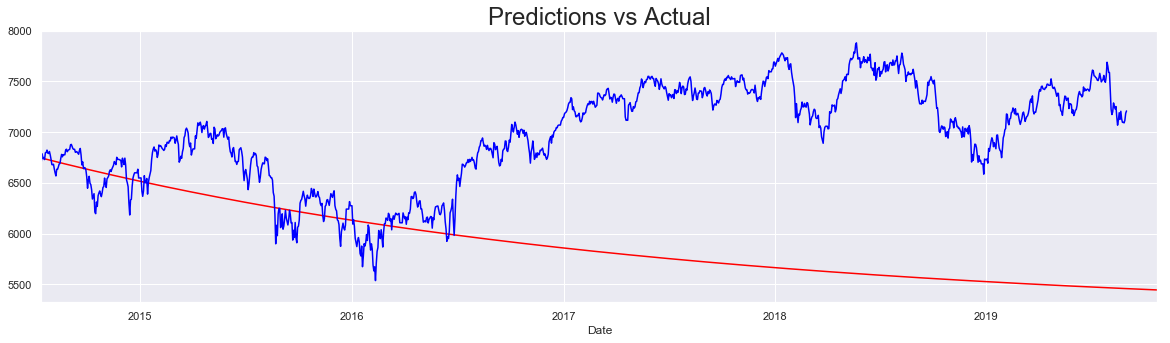

In [ ]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

**Comments**

We see a constant decline.

We are using AR for Non stationary data -> the predictions are only based on a constant coming from the previous period $X_{t-1}$

#### Using Returns Instead

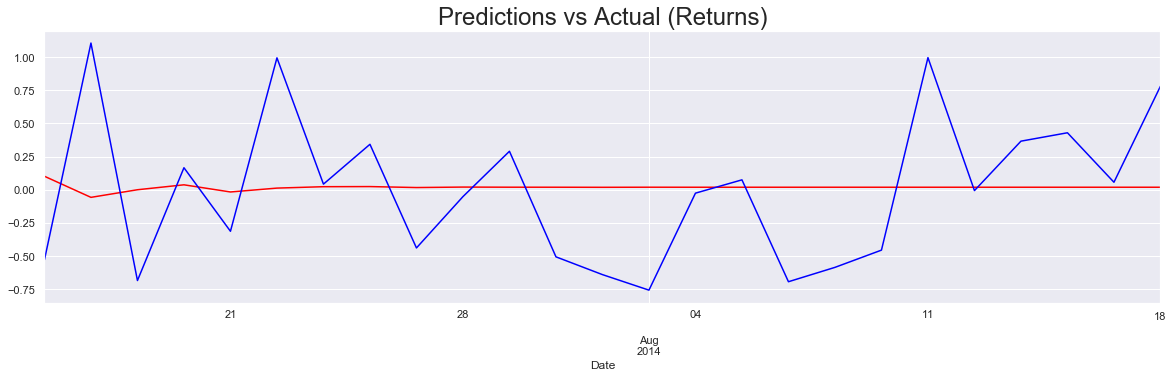

In [ ]:
end_date = "2014-08-18"

model_ret_ar = ARIMA(df.ret_ftse[1:], order = (5,0,0))
results_ret_ar = model_ret_ar.fit()

df_pred_ar = results_ret_ar.predict(start = start_date, end = end_date)

df_pred_ar[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [ ]:
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 5351
Model:                     ARMA(5, 0)   Log Likelihood               -8307.816
Method:                       css-mle   S.D. of innovations              1.143
Date:                Sun, 22 Dec 2019   AIC                          16629.632
Time:                        09:51:20   BIC                          16675.727
Sample:                    01-10-1994   HQIC                         16645.732
                         - 07-14-2014                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0192      0.013      1.438      0.150      -0.007       0.045
ar.L1.ret_ftse    -0.0221      0.014     -1.622      0.105      -0.049       0.005
ar.L2.ret_ftse    -0.0530      0.014     -3.887      0.000      -0.080      -0.026
ar.L3.ret_ftse    -0.0807      0.014     -5.928      0.000      -0.107      -0.054
ar.L4.ret_ftse     0.0421      0.014      3.089      0.002       0.015       0.069
ar.L5.ret_ftse    -0.0563      0.014     -4.122      0.000      -0.083      -0.030
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5667           -0.0000j            1.5667           -0.5000
AR.2           -0.2916           -1.7474j            1.7715           -0.2763
AR.3           -0.2916           +1.7474j            1.7715            0.2763
AR.4            1.4494           -1.2304j            1.9012           -0.1120
AR.5            1.4494           +1.2304j            1.9012            0.1120
-----------------------------------------------------------------------------
"""

**Comments , it perform bad no prediction ->  return almost 0**

incresing the orders performs slightly better but is not good

### MA

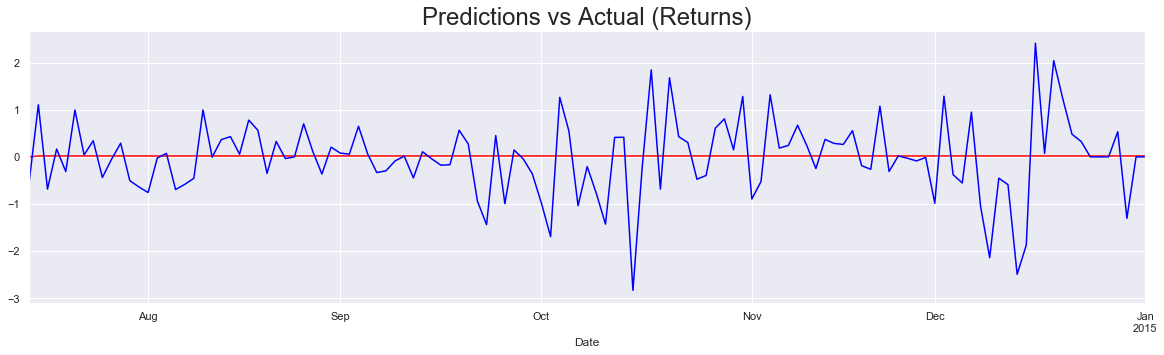

In [ ]:
end_date = "2015-01-01"

model_ret_ma = ARIMA(df.ret_ftse[1:], order=(0,0,1))
results_ret_ma = model_ret_ma.fit()

df_pred_ma = results_ret_ma.predict(start = start_date, end = end_date)

df_pred_ma[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

**Comments**

The results shows clearly similar pattern -> The MA coeff. is so small that it will left just the constant values after a while

In [ ]:
df_pred_ma.head()

2014-07-15   -0.001945
2014-07-16    0.019181
2014-07-17    0.019181
2014-07-18    0.019181
2014-07-21    0.019181
Freq: B, dtype: float64

### ARMA

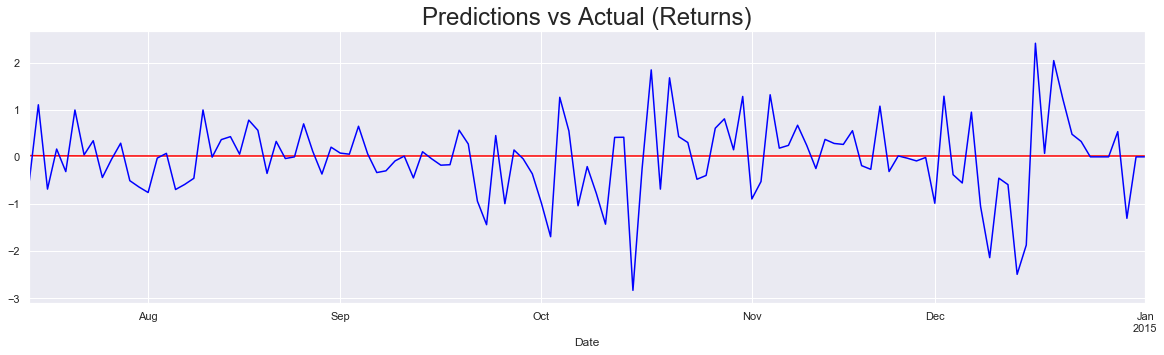

In [ ]:
model_ret_arma = ARIMA(df.ret_ftse[1:], order=(1,0,1))
results_ret_arma = model_ret_arma.fit()

df_pred_arma = results_ret_arma.predict(start = start_date, end = end_date)

df_pred_arma[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [ ]:
df_pred_arma.head()

2014-07-15    0.026788
2014-07-16    0.025055
2014-07-17    0.023718
2014-07-18    0.022688
2014-07-21    0.021894
Freq: B, dtype: float64

In [ ]:
df_pred_arma.tail()

2014-12-26    0.019223
2014-12-29    0.019223
2014-12-30    0.019223
2014-12-31    0.019223
2015-01-01    0.019223
Freq: B, dtype: float64

### ARMAX

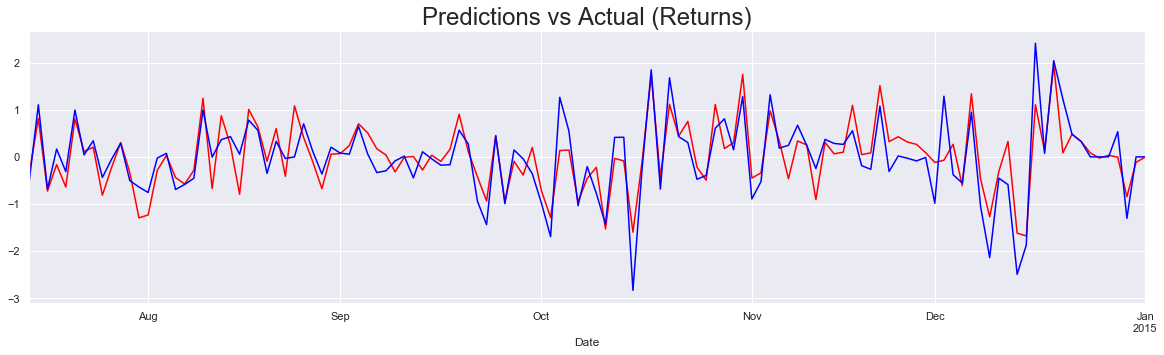

In [ ]:
model_ret_armax = ARIMA(df.ret_ftse[1:], exog = df[["ret_spx","ret_dax","ret_nikkei"]][1:], order = (1,0,1))
results_ret_armax = model_ret_armax.fit()

df_pred_armax = results_ret_armax.predict(start = start_date, end = end_date,
                                          exog = df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date])

df_pred_armax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

### SARMA

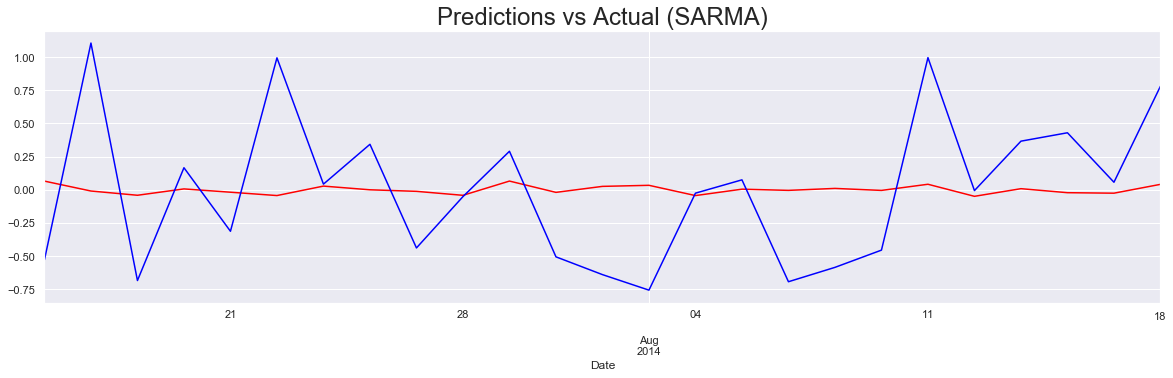

In [ ]:
end_date = "2014-08-18"
model_ret_sarma = SARIMAX(df.ret_ftse[1:], order = (3,0,4), seasonal_order = (3,0,2,5))
results_ret_sarma = model_ret_sarma.fit()

df_pred_sarma = results_ret_sarma.predict(start = start_date, end = end_date)

df_pred_sarma[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (SARMA)", size = 24)
plt.show()

### SARIMAX

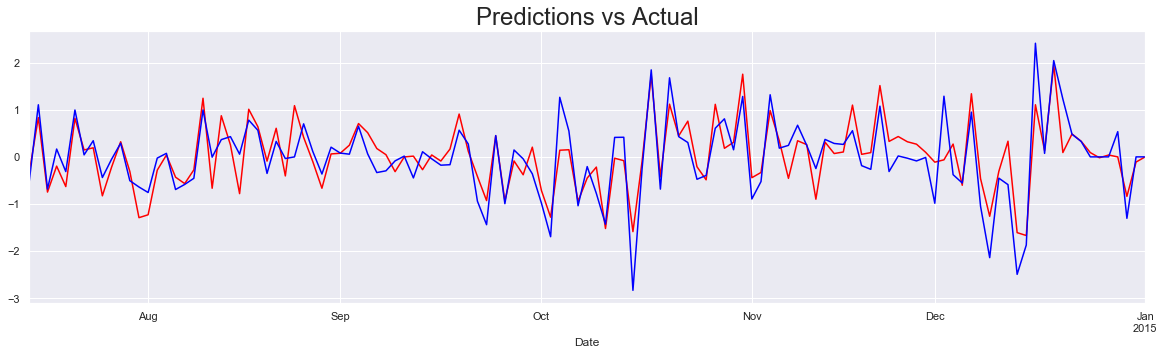

In [ ]:
end_date = "2015-01-01"
model_ret_sarimax = SARIMAX(df.ret_ftse[1:], exog = df[["ret_spx","ret_dax","ret_nikkei"]][1:],
                            order = (3,0,4), seasonal_order = (3,0,2,5))
results_ret_sarimax = model_ret_sarimax.fit()

df_pred_sarimax = results_ret_sarimax.predict(start = start_date, end = end_date,
                                              exog = df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date])

df_pred_sarimax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

### Auto ARIMA

Peculiarity of Auto Arima model:

1. auto_arima dropout a fitted model directly without recalling fit() method

2. Doesn't return a dataframe but an NP array



In [ ]:
model_auto = auto_arima(df.ret_ftse[1:], exogenous = df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
                       m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)

In [ ]:
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods = len(df_test[start_date:end_date]),
                            exogenous = df_test[['ret_spx', 'ret_dax', 'ret_nikkei']][start_date:end_date]),
                            index = df_test[start_date:end_date].index)

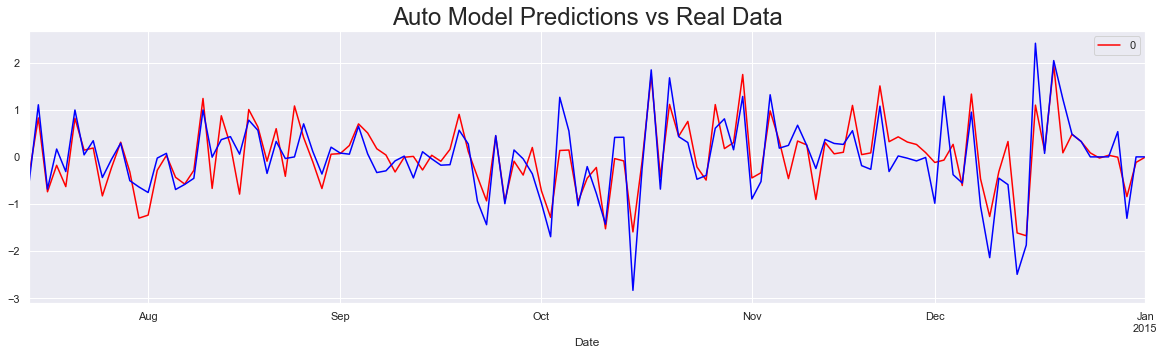

In [ ]:
df_auto_pred.plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

### Comparing All the Models (Returns)

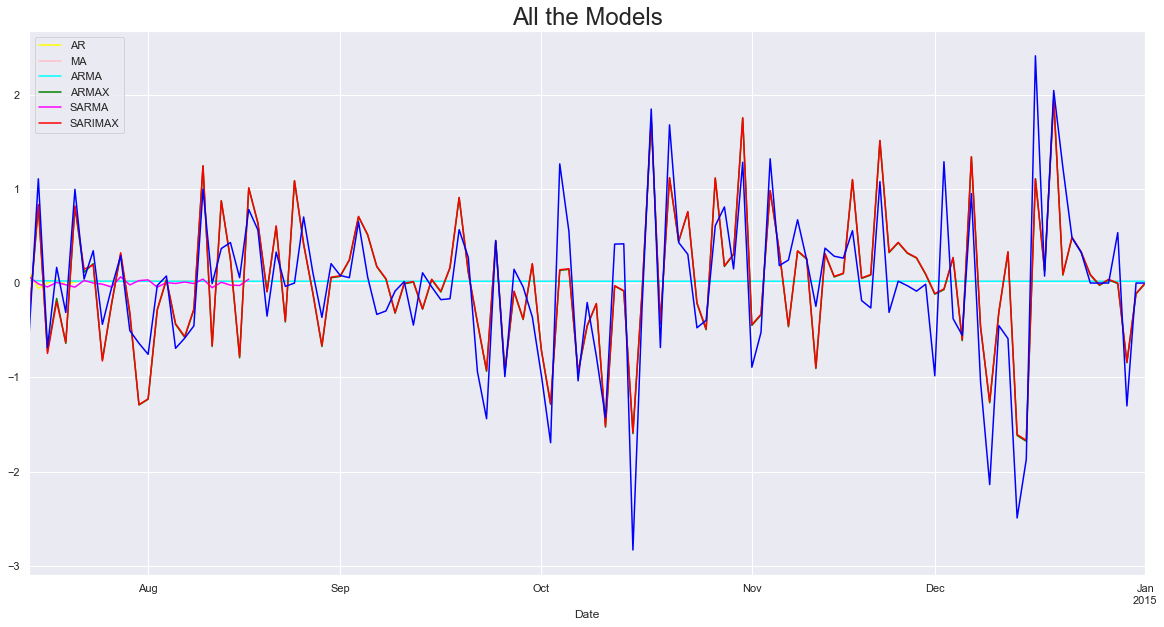

In [ ]:
end_date = "2015-01-01"
df_pred_ar[start_date:end_date].plot(figsize = (20,10), color = "yellow")
df_pred_ma[start_date:end_date].plot(color = "pink")
df_pred_arma[start_date:end_date].plot(color = "cyan")
df_pred_armax[start_date:end_date].plot(color = "green")
df_pred_sarma[start_date:end_date].plot(color = "magenta")
df_pred_sarimax[start_date:end_date].plot(color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.legend(['AR','MA','ARMA','ARMAX','SARMA','SARIMAX'])
plt.title("All the Models", size = 24)
plt.show()

`Pitfalls:`

- We don't see the curves of AR - MA , since the last curve drawn were ARMA

- We can't make long run prediction only based on the error terms , because we'll not have actual values anymore
- We cannot predict the values just using the previous price
- we cannot see ARIMA , since it has a lack of visualization , integrated predicton and actual values cannot be plotted together

`We should create a time series of $Δ from the testing set to compare the integrated predictions`

-

# From Statistical learning to Deep Learning strategies

### MLP with lagged variables for non stationary process

Using Multilayer Perceptron (MLP) with lagged variables for time series forecasting has several advantages:

1. Capturing Temporal Relationships: Lagged variables allow the MLP to learn from past data, which is essential in time series analysis where past values often influence future ones. By incorporating lagged variables, the MLP can recognize patterns and trends over time.

2. Flexibility in Feature Engineering: You have the flexibility to choose how many and which lagged variables to include. This allows for customizing the input features based on the specific characteristics of the time series, like seasonality, trends, and cycles.

3. Handling Non-linear Relationships: MLPs, being a form of neural network, are capable of modeling complex non-linear relationships. This is particularly useful in time series data where the relationship between past and future values may not be linear.

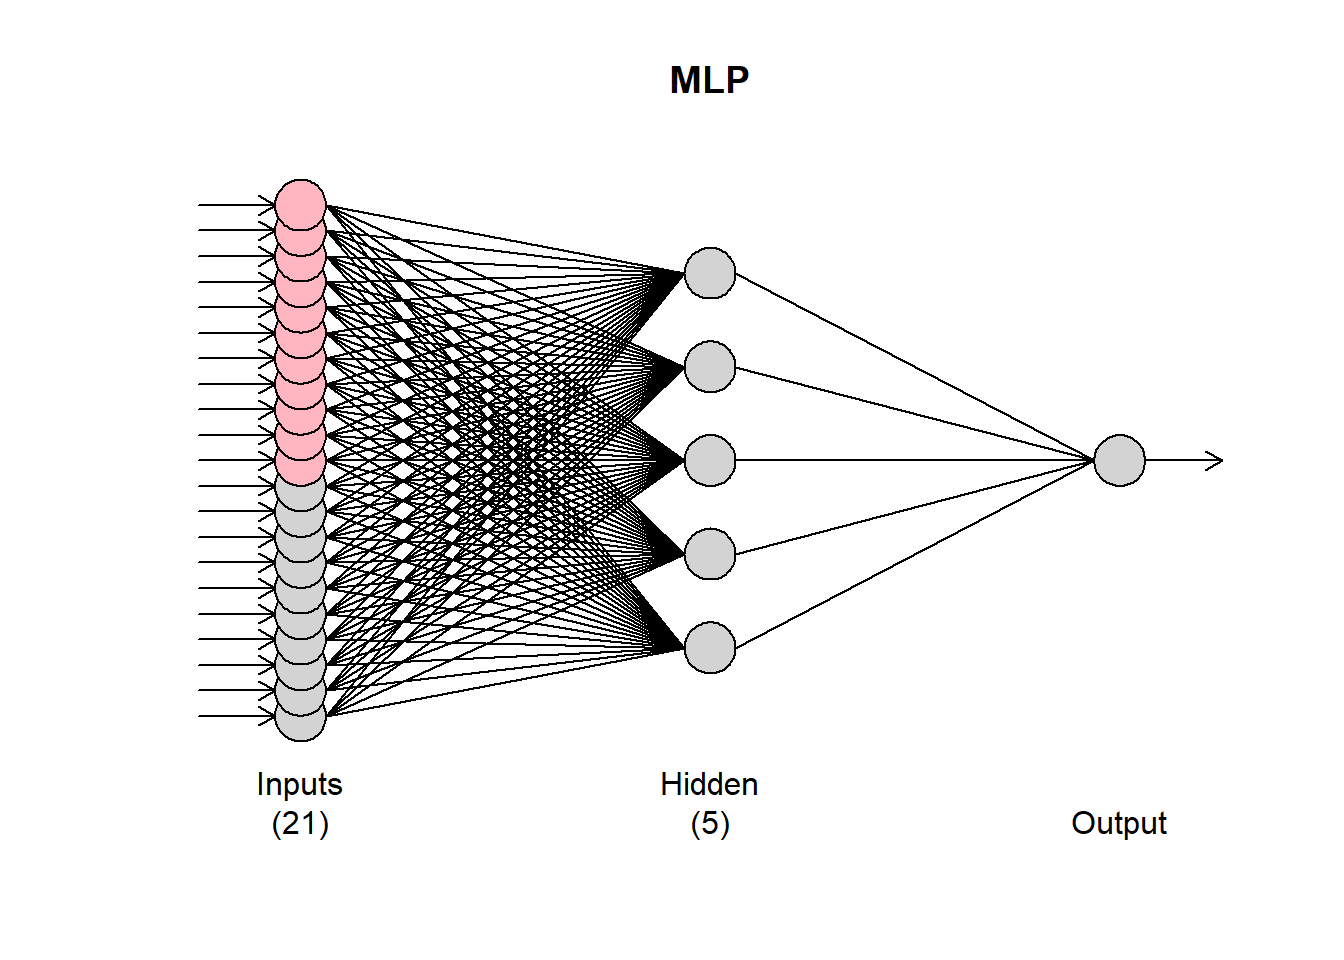

In [ ]:
import pandas as pd

df = pd.read_csv("Index2018.csv")
raw_csv_data = pd.read_csv("Index2018.csv")
df=raw_csv_data.copy()
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.fillna(method='ffill')
df.head()

spx      dax     ftse    nikkei
date                                          
1994-01-07  469.90  2224.95  3445.98  18124.01
1994-01-10  475.27  2225.00  3440.58  18443.44
1994-01-11  474.13  2228.10  3413.77  18485.25
1994-01-12  474.17  2182.06  3372.02  18793.88
1994-01-13  472.47  2142.37  3360.01  18577.26

1. Find the optimal lags number

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read and preprocess the dataset
df = pd.read_csv("Index2018.csv")
df.date = pd.to_datetime(df.date, dayfirst=True)
df.set_index("date", inplace=True)
df = df.fillna(method='ffill')

import pandas as pd
from statsmodels.tsa.stattools import adfuller

def find_optimal_lags(dataframe, columnnames, max_lags=20):
    """
    Function to find the optimal number of lags for each column to satisfy the ADF test.

    Args:
    dataframe (pd.DataFrame): The dataframe containing the time series data.
    columnnames (list): List of column names to evaluate.
    max_lags (int): Maximum number of lags to test for stationarity.

    Returns:
    dict: Dictionary of column names and their respective optimal number of lags.
    """
    optimal_lags = {}
    for column in columnnames:
        for lag in range(1, max_lags + 1):
            # Apply differencing based on the current lag
            differenced_series = dataframe[column].diff(lag).dropna()

            # Perform ADF test
            p_value = adfuller(differenced_series)[1]

            # Check if the series is stationary
            if p_value <= 0.05:
                optimal_lags[column] = lag
                break
        else:
            # If none of the lags up to max_lags make the series stationary,
            # use the max_lags value
            optimal_lags[column] = max_lags

    return optimal_lags

# Example usage:
# Assuming 'df' is your DataFrame and you want to check the first three columns
column_names = df.columns[:3]
optimal_lags = find_optimal_lags(df, column_names)
print(optimal_lags)





{'spx': 1, 'dax': 1, 'ftse': 1}


2. create lagged variables

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame, 'optimal_lags' is the dictionary of optimal lags,
# and 'target_column' is the name of your target variable.
def create_combined_dataset(dataframe, optimal_lags, target_column):
    """
    Create a combined dataset with original features, their lagged versions, and the original target variable.

    Args:
    dataframe (pd.DataFrame): The original dataframe.
    optimal_lags (dict): Dictionary of column names and their respective optimal number of lags.
    target_column (str): Name of the target column.

    Returns:
    pd.DataFrame: Dataframe with original features, lagged features, and the original target variable.
    """
    combined_df = pd.DataFrame(index=dataframe.index)

    # Include original features
    for column in dataframe.columns:
        if column != target_column:  # Exclude target column from lagging
            combined_df[column] = dataframe[column]

            # Create lagged features for each column based on optimal lags
            for lag in range(1, optimal_lags.get(column, 1) + 1):
                combined_df[f'{column}_lag_{lag}'] = dataframe[column].shift(lag)

    # Add the original target variable
    combined_df[target_column] = dataframe[target_column]

    # Remove rows with NaN values created by lagging
    combined_df.dropna(inplace=True)
    return combined_df

# Example usage
target_column = 'nikkei'  # Replace with your target column name
combined_df = create_combined_dataset(df, optimal_lags, target_column)
combined_df.head()


spx  spx_lag_1      dax  dax_lag_1     ftse  ftse_lag_1  \
date                                                                     
1994-01-10  475.27     469.90  2225.00    2224.95  3440.58     3445.98   
1994-01-11  474.13     475.27  2228.10    2225.00  3413.77     3440.58   
1994-01-12  474.17     474.13  2182.06    2228.10  3372.02     3413.77   
1994-01-13  472.47     474.17  2142.37    2182.06  3360.01     3372.02   
1994-01-14  474.91     472.47  2151.05    2142.37  3400.56     3360.01   

              nikkei  
date                  
1994-01-10  18443.44  
1994-01-11  18485.25  
1994-01-12  18793.88  
1994-01-13  18577.26  
1994-01-14  18973.70

##### Preprocessing with shuffling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def preprocess_data_for_mlp(dataframe, target_column, test_size=0.2, random_state=42):
    """
    Preprocess the data for MLP training. Splits data, normalizes features, and creates an MLP model.

    Args:
    dataframe (pd.DataFrame): The input dataframe.
    target_column (str): The name of the target column in the dataframe.
    test_size (float): Proportion of the dataset to include in the test split.
    random_state (int): Controls the shuffling applied to the data before applying the split.

    Returns:
    tuple: (X_train, X_test, y_train, y_test, model) where `model` is an instance of a Keras Sequential model.
    """
    # Splitting the dataset into features and target
    X = dataframe.drop(target_column, axis=1)
    y = dataframe[target_column]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define MLP model
    model = Sequential()
    model.add(Dense(200, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return X_train_scaled, X_test_scaled, y_train, y_test, model

model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 50)                200       
                                                                 
 dense_39 (Dense)            (None, 100)               5100      
                                                                 
 dense_40 (Dense)            (None, 25)                2525      
                                                                 
 dense_41 (Dense)            (None, 1)                 26        
                                                                 
Total params: 7851 (30.67 KB)
Trainable params: 7851 (30.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Example usage
target_column = 'nikkei'  # Replace with your target column name
X_train, X_test, y_train, y_test, mlp_model = preprocess_data_for_mlp(combined_df, target_column)

# Fit the model
history = mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# After fitting the model, you can evaluate its performance
loss = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

# Optionally, plot the training history for loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


date
2006-02-16    16043.670
1999-03-08    14779.050
2017-06-21    20138.790
2015-04-02    19312.790
2003-09-09    10922.040
                ...    
2002-07-31     9877.940
2014-02-13    14534.738
1994-06-07    21042.710
2015-06-18    19990.820
2004-05-21    11070.250
Name: nikkei, Length: 1254, dtype: float64

40/40 [==============================] - 0s 2ms/step


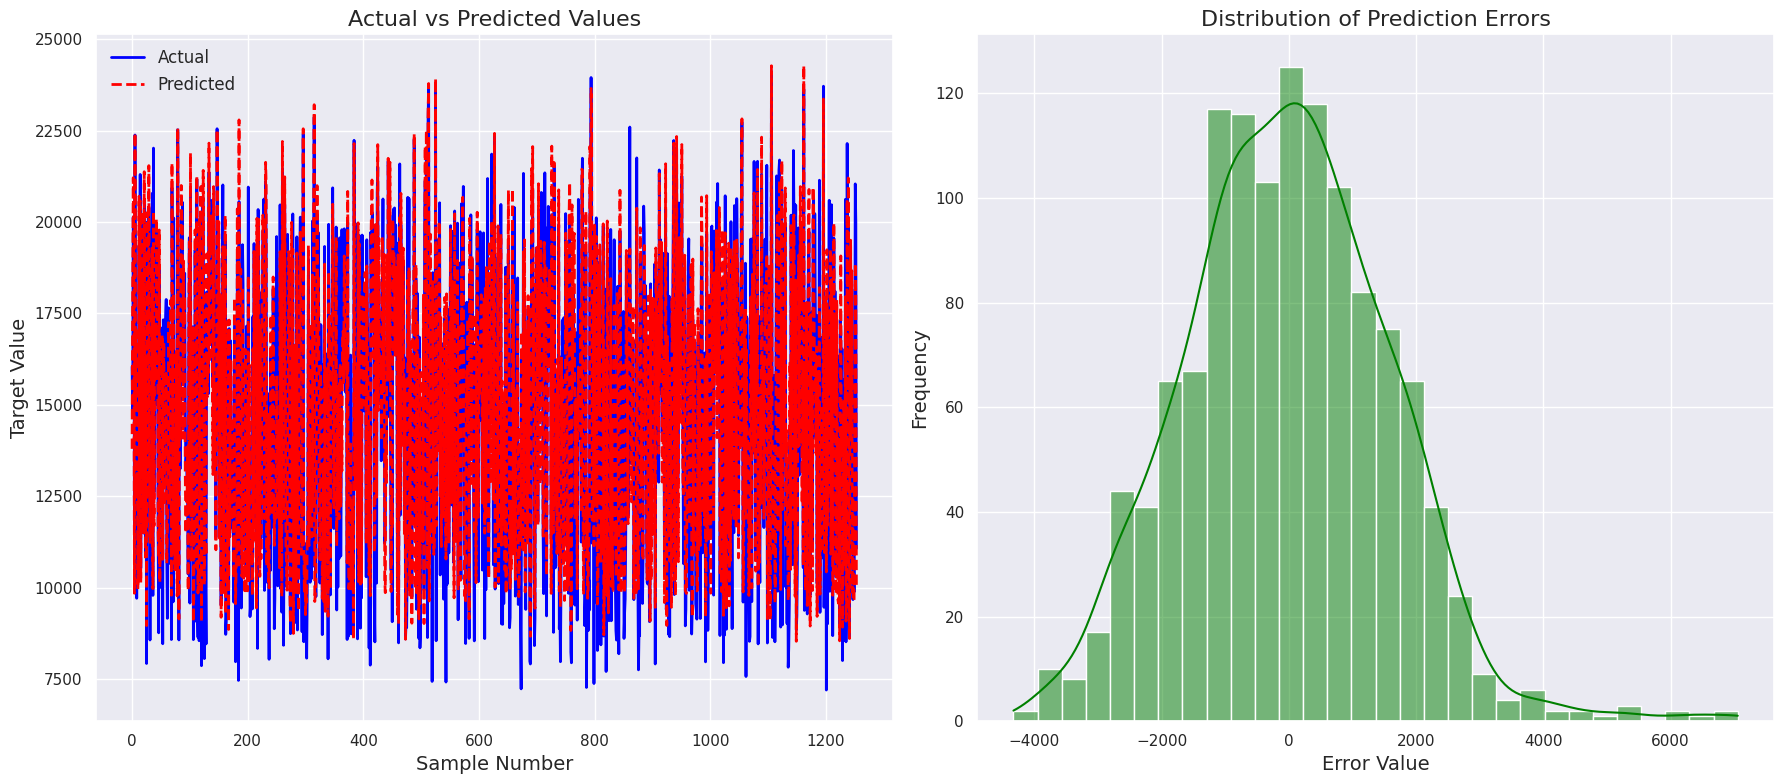

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred = mlp_model.predict(X_test).flatten()

# Calculate error values
errors = y_test - y_pred

# Set up the matplotlib figure
plt.figure(figsize=(18, 8))

# First subplot: Actual vs Predicted
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(y_test.reset_index(drop=True), label='Actual', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Sample Number', fontsize=14)
plt.ylabel('Target Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Second subplot: Distribution of Errors
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(errors, bins=30, kde=True, color='green')
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.xlabel('Error Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


#### Preprocessing without shuffling 80% 20%

Test Loss: 27916914.0


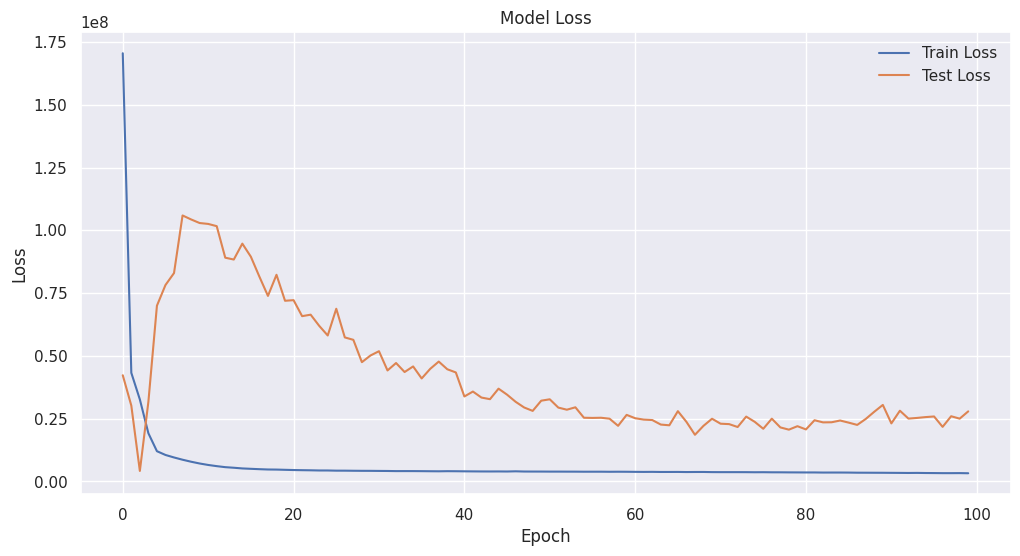

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def preprocess_data_for_mlp(dataframe, target_column, test_size=0.2):
    """
    Preprocess the data for MLP training. Splits data, normalizes features, and creates an MLP model.

    Args:
    dataframe (pd.DataFrame): The input dataframe.
    target_column (str): The name of the target column in the dataframe.
    test_size (float): Proportion of the dataset to include in the test split.

    Returns:
    tuple: (X_train, X_test, y_train, y_test, model) where `model` is an instance of a Keras Sequential model.
    """
    # Splitting the dataset into features and target
    X = dataframe.drop(target_column, axis=1)
    y = dataframe[target_column]

    # Manual split of data into train and test sets
    test_size = int(len(X) * test_size)
    X_train, X_test = X.iloc[:-test_size], X.iloc[-test_size:]
    y_train, y_test = y.iloc[:-test_size], y.iloc[-test_size:]

    # Normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define MLP model
    model = Sequential()
    model.add(Dense(200, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return X_train_scaled, X_test_scaled, y_train, y_test, model

# Example usage
target_column = 'nikkei'  # Replace with your target column name
X_train, X_test, y_train, y_test, mlp_model = preprocess_data_for_mlp(combined_df, target_column)

# Fit the model
history = mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# After fitting the model, you can evaluate its performance
loss = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

# Optionally, plot the training history for loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


40/40 [==============================] - 0s 3ms/step


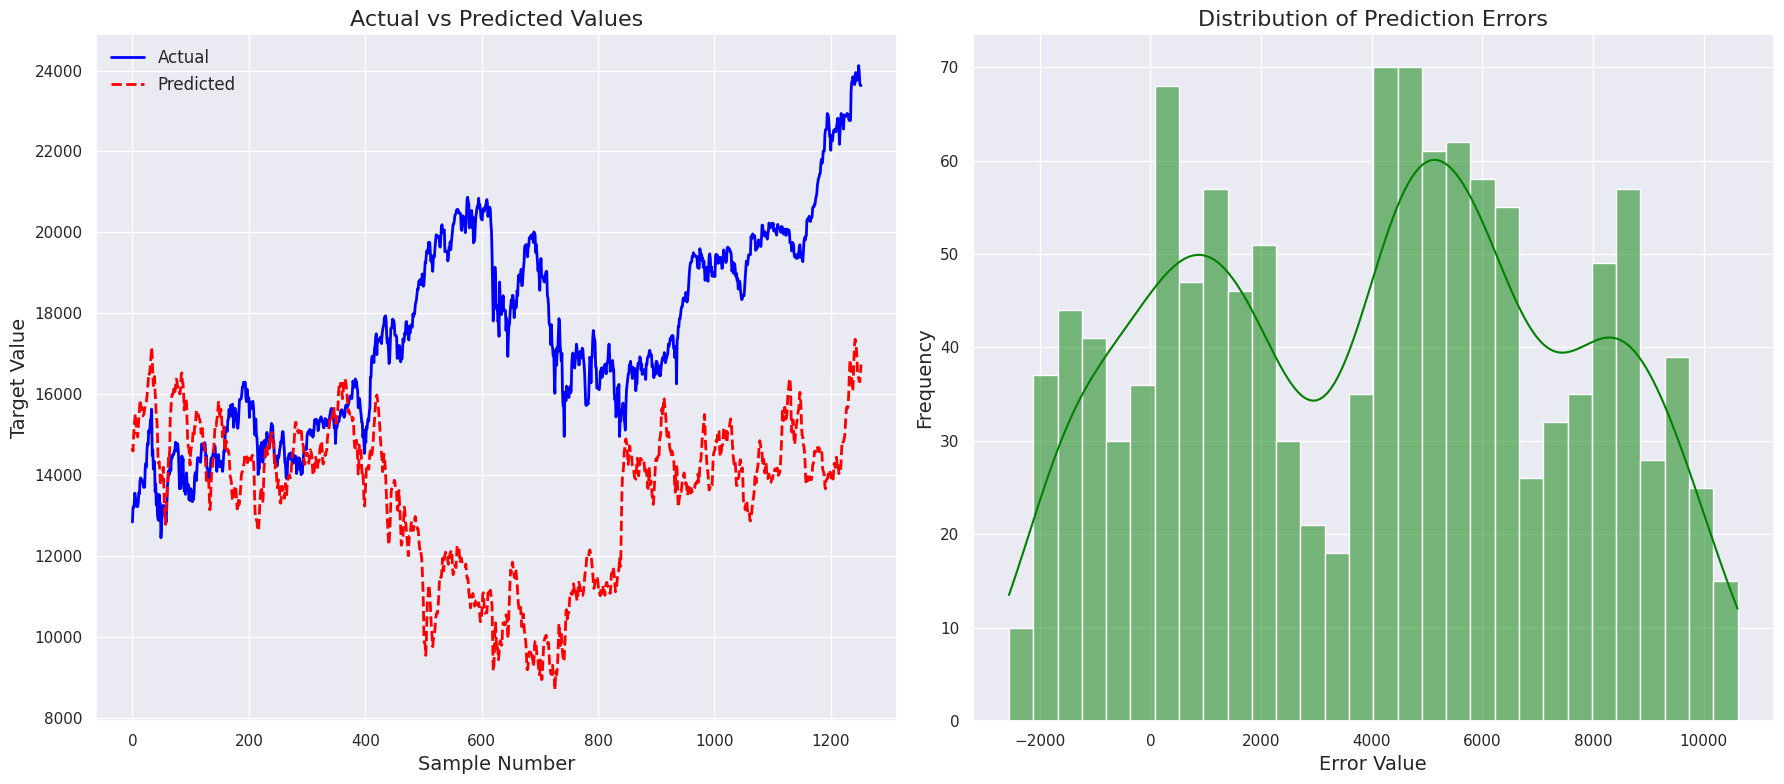

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred = mlp_model.predict(X_test).flatten()

# Calculate error values
errors = y_test - y_pred

# Set up the matplotlib figure
plt.figure(figsize=(18, 8))

# First subplot: Actual vs Predicted
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(y_test.reset_index(drop=True), label='Actual', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Sample Number', fontsize=14)
plt.ylabel('Target Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Second subplot: Distribution of Errors
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(errors, bins=30, kde=True, color='green')
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.xlabel('Error Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Recurrent Neural Networks


1. RNN
All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

**RNN Formulation**

`Basic RNN Unit:`

$h_t = \sigma(W_{xh} x_t + W_{hh} h_{t-1} + b_h)$ hidden states

$y_t = \sigma(W_{hy} h_t + b_y)$

Notations:

$x_t: Input vector at time step t.$

$h_t: Hidden state at time step t, serving as the 'memory' of the network.$

$y_t: Output vector at time step t.$

$W_{xh}, W_{hh}, W_{hy}: Weight matrices.$

$b_h, b_y: Bias vectors.$

$\sigma: Activation function (like tanh or ReLU).$


` Weigth matrix (learnable parameters)`



$W_{xh}$ - Input to Hidden Weight Matrix:
-  This matrix contains the weights for the connections between the input layer and the hidden layer.
- For each time step $t$, the matrix $W_{xh}$ is used to transform the input vector $x_t$ before it is sent to the hidden layer.
-  The dimensions of $W_{xh}$ depend on the size of the input layer and the size of the hidden layer.
\end{itemize}

$W_{hh}$ - Hidden to Hidden Weight Matrix:
- $W_{hh}$ is the weight matrix that connects the hidden layer to itself at the next time step.
- This matrix is essential for the recurrent nature of the RNN, allowing the network to pass information from one time step to the next.
-  It essentially captures the relationship between the hidden state at time $t-1$ and the hidden state at time $t$.
-  The dimensions of $W_{hh}$ are determined by the size of the hidden layer.


$W_{hy}$ - Hidden to Output Weight Matrix:
- $W_{hy}$ contains the weights for the connections between the hidden layer and the output layer.
-  It is used to transform the hidden state $h_t$ into the output $y_t$.
-  The dimensions of $W_{hy}$ are based on the size of the hidden layer and the size of the output layer.



`Role of Hidden States`


$h_t = \sigma(W_{xh} x_t + W_{hh} h_{t-1} + b_h)$ ->hidden states  

Hidden states in Recurrent Neural Networks (RNNs) serve as a memory mechanism, carrying information across time steps. They dynamically capture and update temporal dependencies based on both the current input and the information from previous time steps.

- Comparison to Lagged Variables:

In traditional time series analysis, lagged variables represent past values shifted in time. While lagged variables explicitly use past data points, hidden states in RNNs implicitly encode this historical information. This makes RNNs more adept at handling sequential data without the need for predefined lag structures.

- Advantages:

RNNs can capture longer-term dependencies more flexibly than models relying on fixed lagged variables. The hidden states evolve and adapt continuously, providing a sophisticated approach to sequence modeling.

`Architecture`

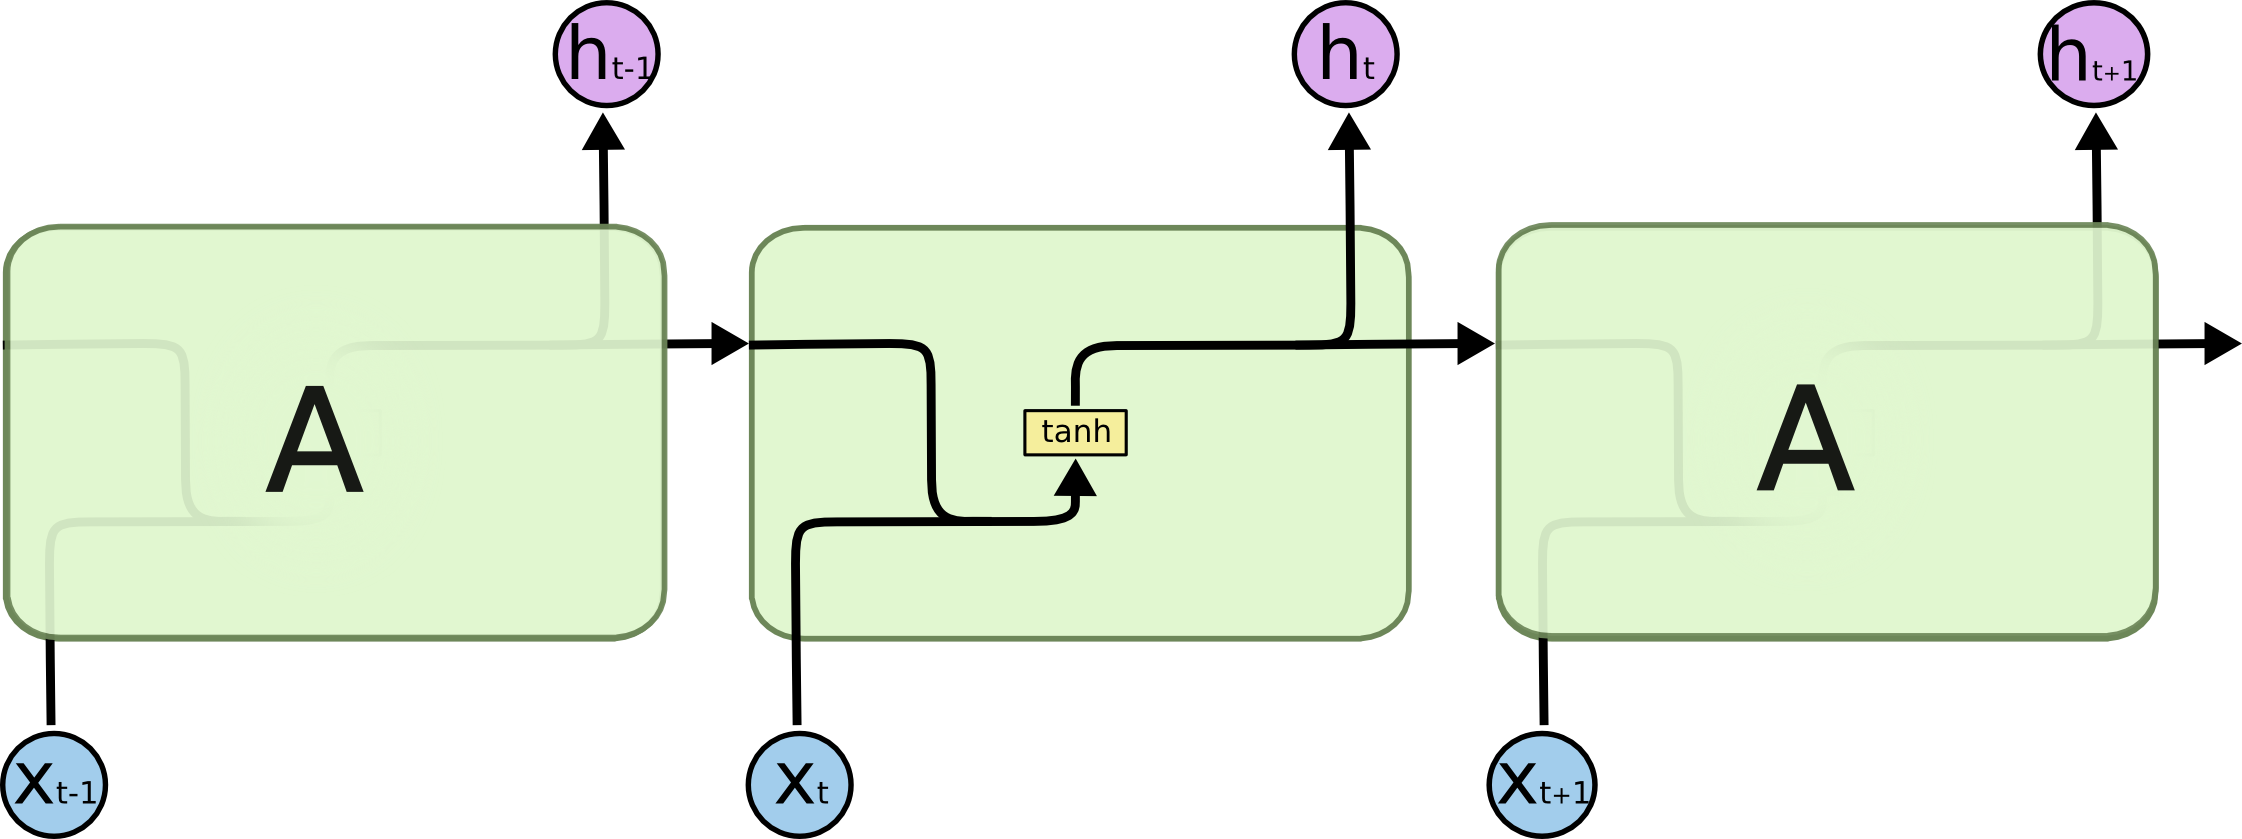

`Formulation`

1. Input Sequence: $x_1, x_2, \ldots, x_t$
2. Hidden State: $h_t$
3. Initialization: $h_0 = \mathbf{0}$ or small random values
4. Recurrent Connection: $h_t = f(W_{xh} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h)$
5. Output: $y_t = g(W_{hu} \cdot h_t + b_u)$ or $y = g(W_{hu} \cdot h_t + b_u)$

Training: Use a loss function (e.g., cross-entropy) and optimization to update weights.


**RNN VS  LSTM**

**Need for LSTM**

The vanishing gradient problem occurs because the gradients of $h_t$ with respect to $h_{t-1}$ tend to become very small when the recurrent weight matrix $W_{hh}$ has eigenvalues less than 1 meaning that this transformation has the effect of shrinking the magnitude of the hidden state at each time step.

**Problem solved By LSTM:**

Introduction of Gates: LSTMs introduce three gates (forget gate, input gate, and output gate) that control the flow of information through the cell state. These gates learn how much information should be forgotten, added, or output at each time step.

`Specifically`

Hidden State Update: The hidden state ($h_t$) is then computed based on the updated cell state ($c_t$) and the output gate ($o_t$). The use of the cell state helps LSTMs capture long-term dependencies.



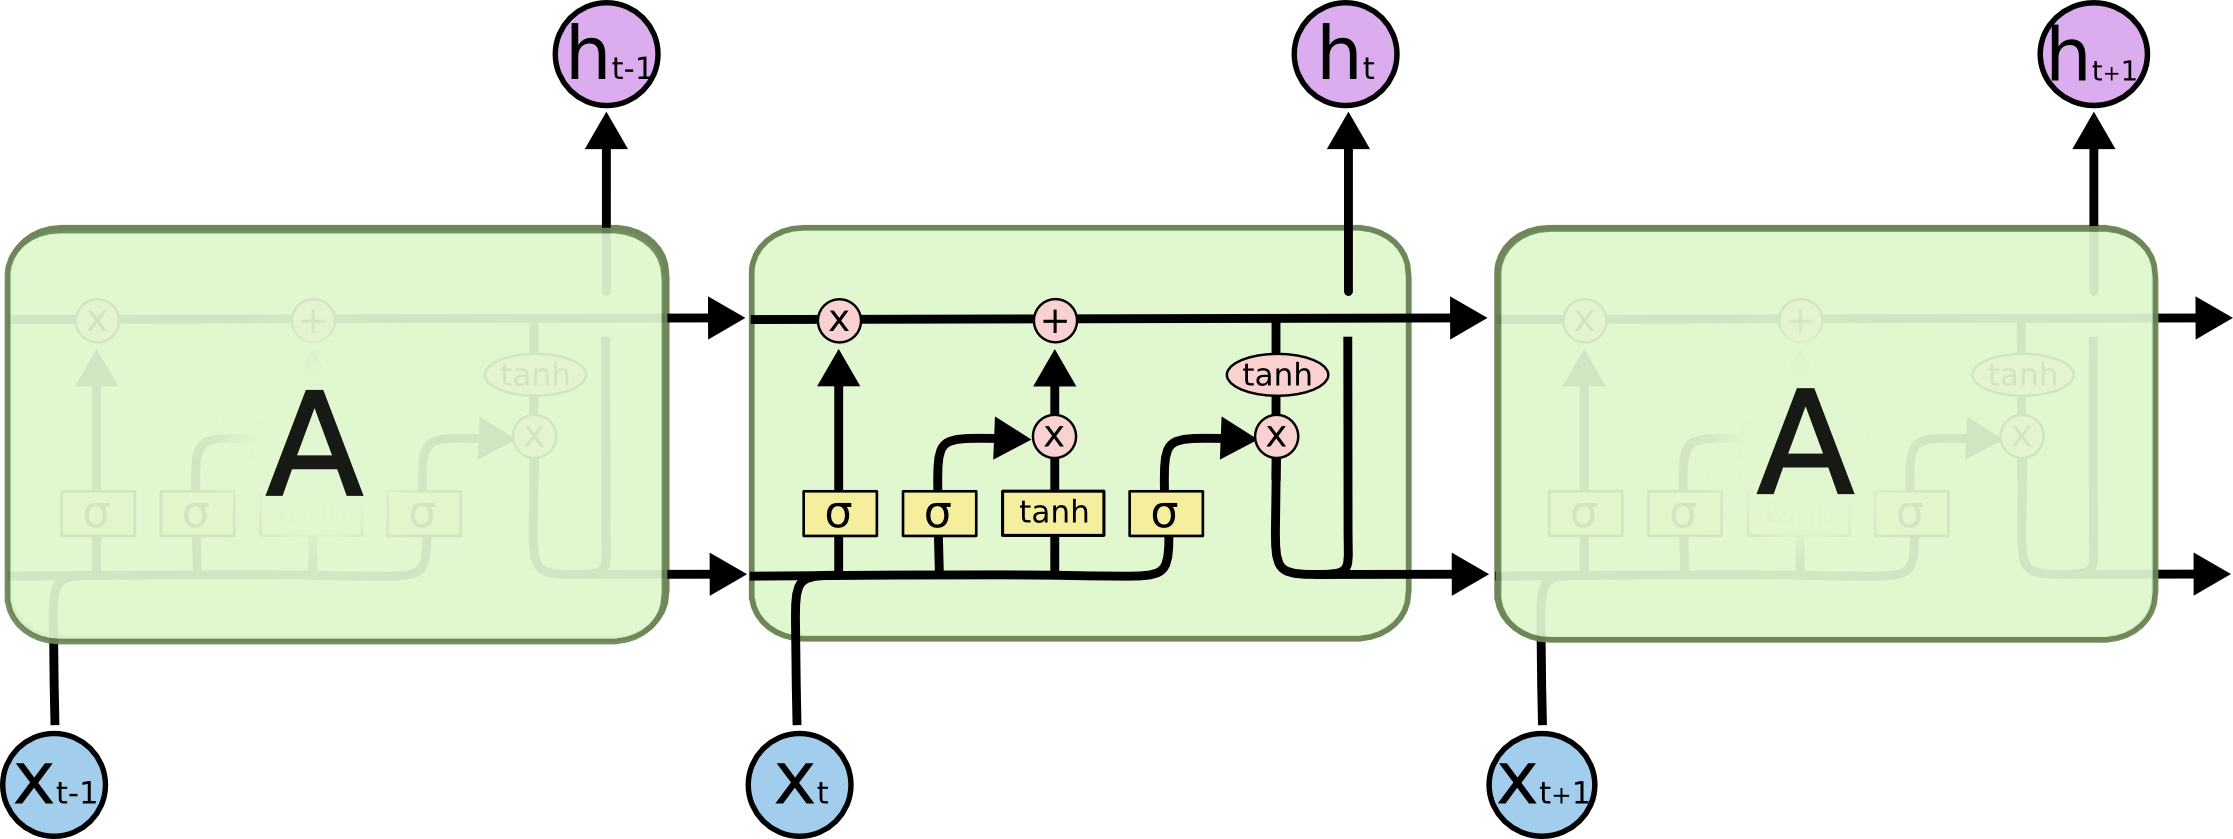

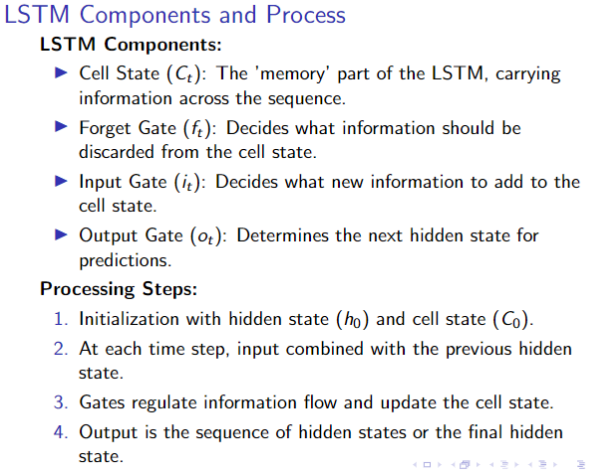

`Operations`

1. Forget Gate:

$f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)$

2. Input Gate:


$i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)$
$\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)$

3. Cell State Update:

$C_t = f_t * C_{t-1} + i_t * \tilde{C}_t$

4. Output Gate:

$o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)$
$h_t = o_t * \tanh(C_t)$

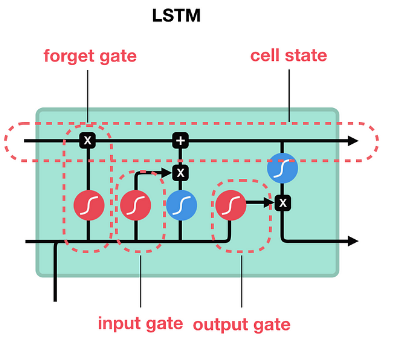

**Processing input sequence**

The input sequence is processed one time step at a time.
At each time step, every LSTM cell receives two pieces of information:
Current Input: This is the data point for the current time step. All 50 cells receive the same input at each time step.
Previous Hidden State: Each cell has its own hidden state from the previous time step.

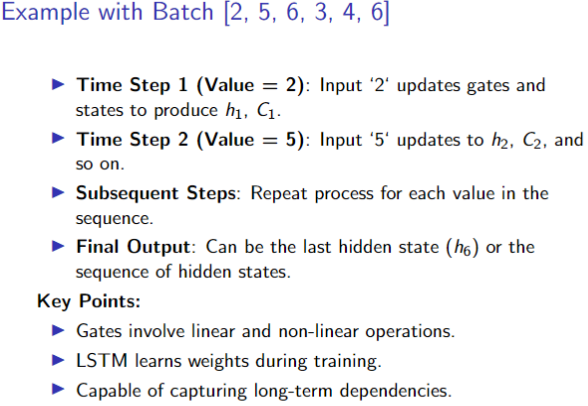

#### LSTM

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

def preprocess_and_create_lstm(dataframe, target_column, window_size, n_features):
    """
    Preprocess the data for LSTM, create data batches with a sliding window, and build the LSTM model.

    Args:
    dataframe (pd.DataFrame): The input dataframe.
    target_column (str): The name of the target column.
    window_size (int): The size of the sliding window.
    n_features (int): Number of features in the dataset.

    Returns:
    tuple: (X_train, y_train, X_test, y_test, model), where `model` is a Keras LSTM model.
    """
    # Normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataframe)

    # Create data with sliding windows
    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i, :n_features])
        y.append(scaled_data[i, dataframe.columns.get_loc(target_column)])

    X, y = np.array(X), np.array(y)

    # Split data into train and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Define LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], n_features)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=25))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return X_train, y_train, X_test, y_test, model


In [ ]:
import matplotlib.pyplot as plt

# Example usage
window_size = 60  # Example window size
n_features = len(df.columns)  # Number of features in the dataset
X_train, y_train, X_test, y_test, lstm_model = preprocess_and_create_lstm(df, 'nikkei', window_size, n_features)

# Fit the model
history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)





Epoch 1/100
156/156 [==============================] - 25s 106ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 2/100
156/156 [==============================] - 11s 72ms/step - loss: 5.5184e-04 - val_loss: 0.0040
Epoch 3/100
156/156 [==============================] - 12s 76ms/step - loss: 5.3810e-04 - val_loss: 0.0020
Epoch 4/100
156/156 [==============================] - 12s 77ms/step - loss: 4.7608e-04 - val_loss: 0.0017
Epoch 5/100
156/156 [==============================] - 11s 71ms/step - loss: 4.5471e-04 - val_loss: 5.0263e-04
Epoch 6/100
156/156 [==============================] - 11s 69ms/step - loss: 4.1859e-04 - val_loss: 9.5131e-04
Epoch 7/100
156/156 [==============================] - 12s 76ms/step - loss: 4.0914e-04 - val_loss: 4.6708e-04
Epoch 8/100
156/156 [==============================] - 12s 75ms/step - loss: 3.6497e-04 - val_loss: 4.2740e-04
Epoch 9/100
156/156 [==============================] - 11s 73ms/step - loss: 3.5121e-04 - val_loss: 0.0020
Epoch 10/100
156/156 [==

NameError: ignored

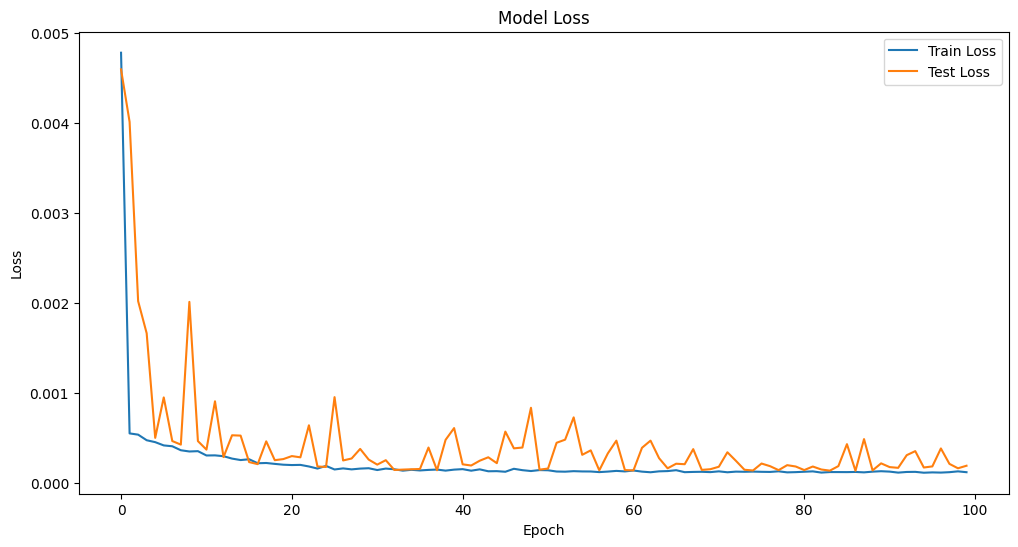

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

39/39 [==============================] - 1s 18ms/step


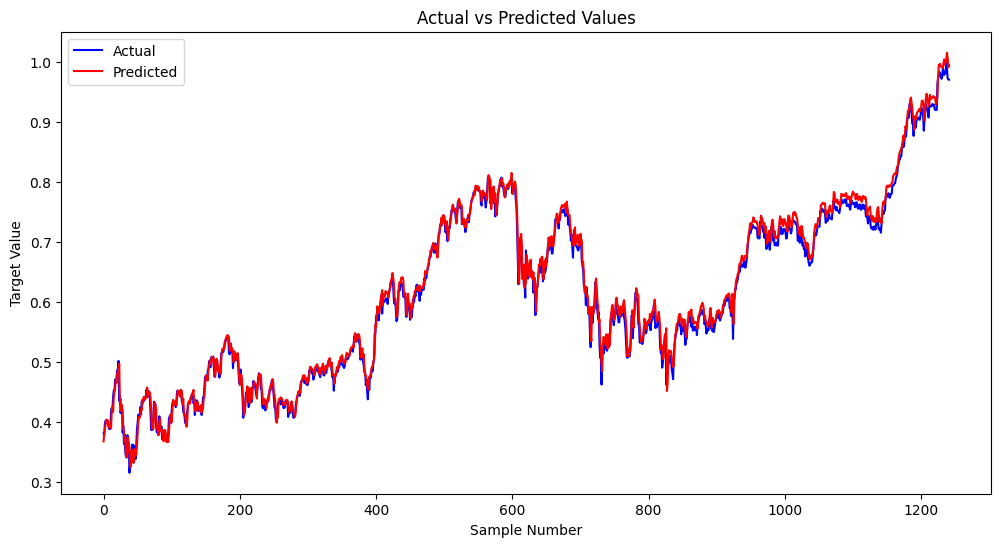

In [ ]:
# Make predictions
y_pred = lstm_model.predict(X_test)

errors = y_test - y_pred

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Number')
plt.ylabel('Target Value')
plt.legend()
plt.show()

# Project

https://colab.research.google.com/drive/1Uldrz35RgI9Stfft6f1zQrgzop8hlElc?usp=sharing